<p align="center"><font size="6"><b>Notebook de Charles-Henri SAINT-MARS</b></font></p>

# **La visualisation de données (les graphiques)**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données avec Pandas

Ce jeu de données fournit des informations détaillées sur les transactions effectuées lors du "Black Friday" dans un magasin américain. Cette journée de soldes, qui suit traditionnellement la fête de Thanksgiving aux États-Unis, est connue pour ses promotions exceptionnelles. Le dataset se compose de 12 colonnes, chacune apportant des éléments clés sur les acheteurs et leurs achats :

- User_ID : Identifiant unique de l'acheteur
- Product : Identifiant du produit acheté
- Gender : Sexe de l'acheteur
- Age : Tranche d'âge de l'acheteur
- Occupation : Catégorie professionnelle de l'acheteur (valeurs codées entre 0 et 20)
- City_Category : Classification de la ville de résidence (A, B ou C)
- Stay_In_Current_City_Years : Durée de résidence dans la ville actuelle
- Marital_Status : Statut marital de l'acheteur (0 = célibataire, 1 = marié)
- Product_Category_1 : Catégorie principale du produit (valeurs codées entre 1 et 20)
- Product_Category_2 : Sous-catégorie du produit (si applicable)
- Product_Category_3 : Sous-catégorie additionnelle (si applicable)
- Purchase : Montant de l'achat

L'objectif de cette étude est d'analyser en profondeur le comportement d'achat des clients lors de cet événement commercial majeur. Cette analyse permettra de mieux comprendre les tendances de consommation, les préférences des clients selon leurs caractéristiques démographiques, et l'impact des différentes catégories de produits sur les ventes durant le Black Friday.

In [63]:
black_friday = pd.read_csv('BlackFriday.csv')

In [64]:
black_friday

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [65]:
# 10 premières lignes
black_friday.head(10) 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [66]:
# Types de chaque colonne
black_friday.dtypes 

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [67]:
# Informations générales sur les colonnes
black_friday.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [68]:
# Regrouper les données par age et compter le nombre d'achats par age
age_groupe = black_friday.groupby('Age') 
age_groupe.count()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,,,,,,
0-17,14707,14707,14707,14707,14707,14707,14707,14707,10466,4789,14707
18-25,97634,97634,97634,97634,97634,97634,97634,97634,68256,30889,97634
26-35,214690,214690,214690,214690,214690,214690,214690,214690,147745,65916,214690
36-45,107499,107499,107499,107499,107499,107499,107499,107499,74169,32758,107499
46-50,44526,44526,44526,44526,44526,44526,44526,44526,30441,13135,44526
51-55,37618,37618,37618,37618,37618,37618,37618,37618,25652,11018,37618
55+,20903,20903,20903,20903,20903,20903,20903,20903,13862,5773,20903


In [69]:
# Compter le nombre d'achats par age et par sexe
age_groupe.value_counts()

Age   User_ID  Product_ID  Gender  Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  Purchase
0-17  1000001  P00000142   F       10          A              2                           0               3                   4.0                 5.0                 13650       1
               P00004842   F       10          A              2                           0               3                   4.0                 12.0                13645       1
      1001434  P00244242   F       10          A              0                           0               1                   2.0                 15.0                4250        1
      1001509  P00032042   M       0           B              3                           0               1                   2.0                 15.0                15557       1
               P00034742   M       0           B              3                           0              

In [70]:
# Déterminer la somme des achats par age
age_groupe['Purchase'].sum() 

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

In [71]:
# Mettre la somme des achats par age dans un dictionnaire
montants_totaux_achats_par_age = dict()
for age, group in age_groupe:
    montants_totaux_achats_par_age[age] = sum(group["Purchase"])

montants_totaux_achats_par_age

{'0-17': 132659006,
 '18-25': 901669280,
 '26-35': 1999749106,
 '36-45': 1010649565,
 '46-50': 413418223,
 '51-55': 361908356,
 '55+': 197614842}

## <font color="red">La visualisation des données avec Matplotlib</font>

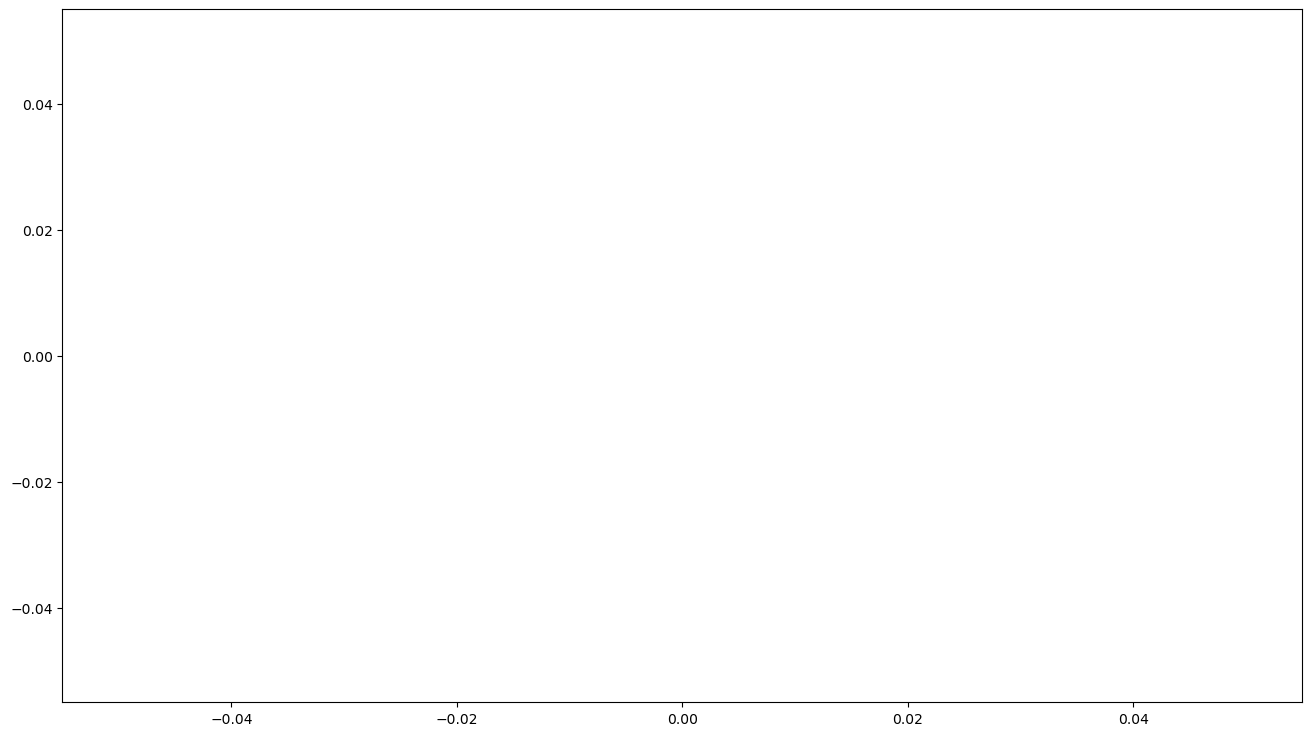

In [72]:
# Graphique vide avec Matplotlib
plt.plot()
plt.show()
# ou plt.draw()

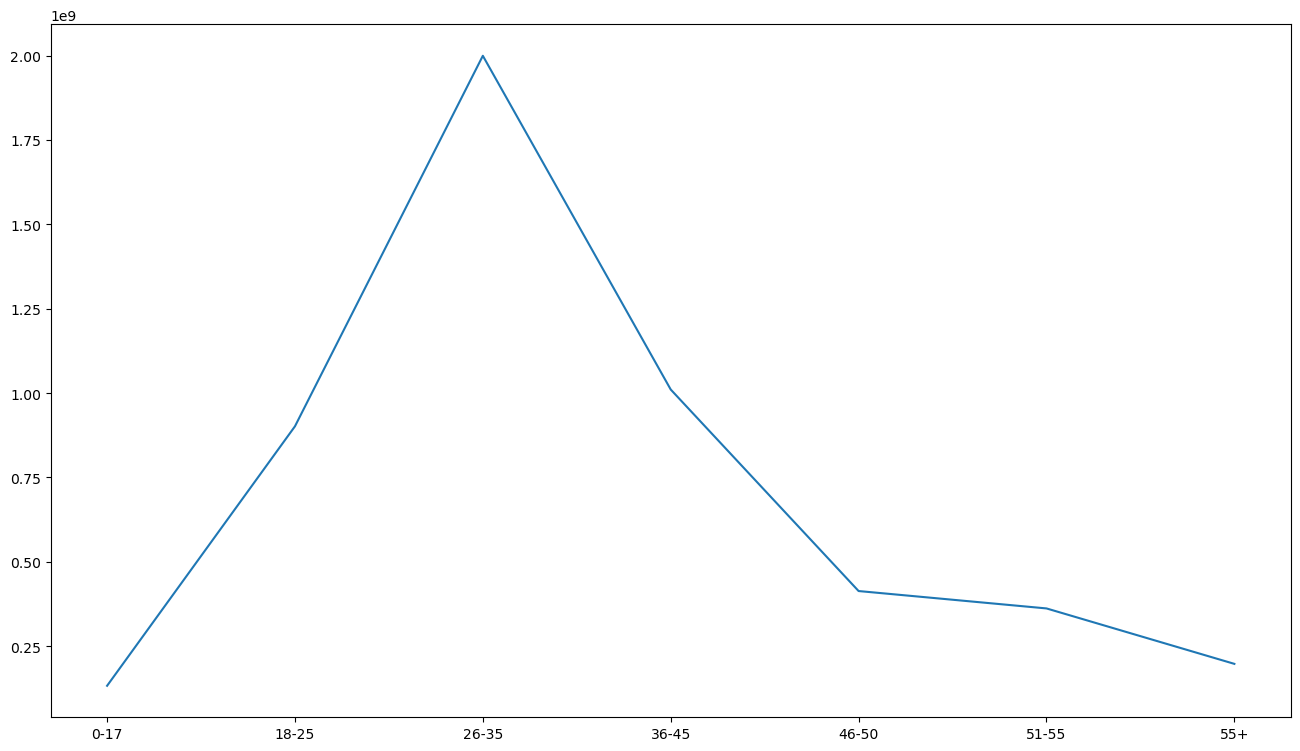

In [73]:
# Tracer un graphique des montants totaux en fonction des tranches d'âge
plt.plot(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values())
plt.show()

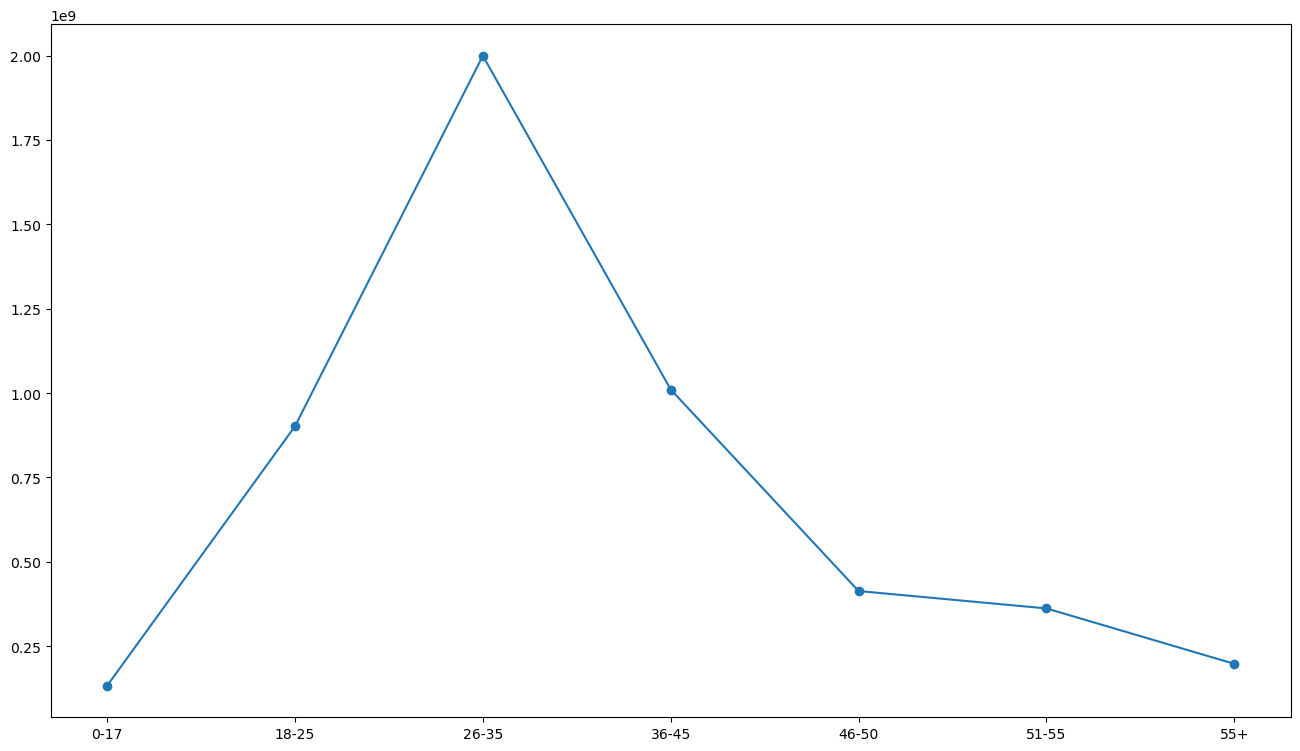

In [74]:
# Ajouter des marqueurs de type point
plt.plot(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker='o')
plt.show()

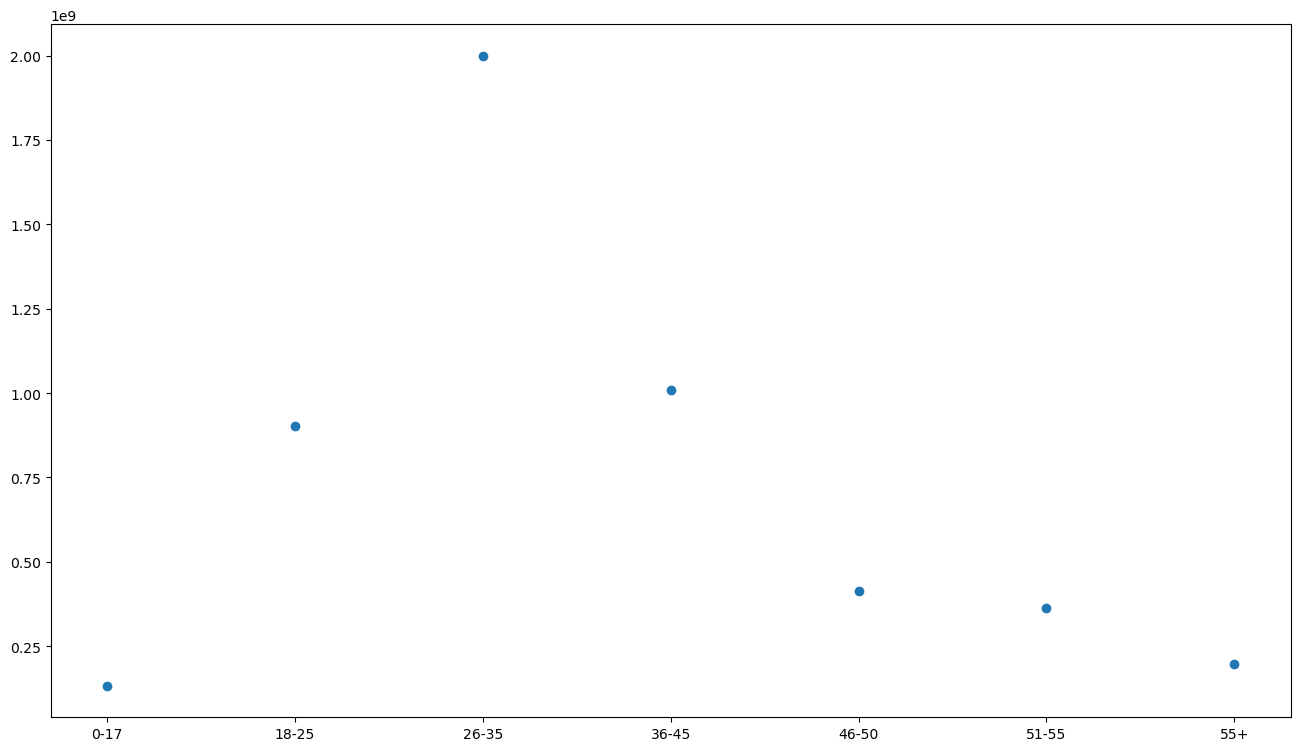

In [75]:
# Ajouter des marqueurs de type point sans tracer les lignes
plt.plot(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker='o', linestyle="")
plt.show()

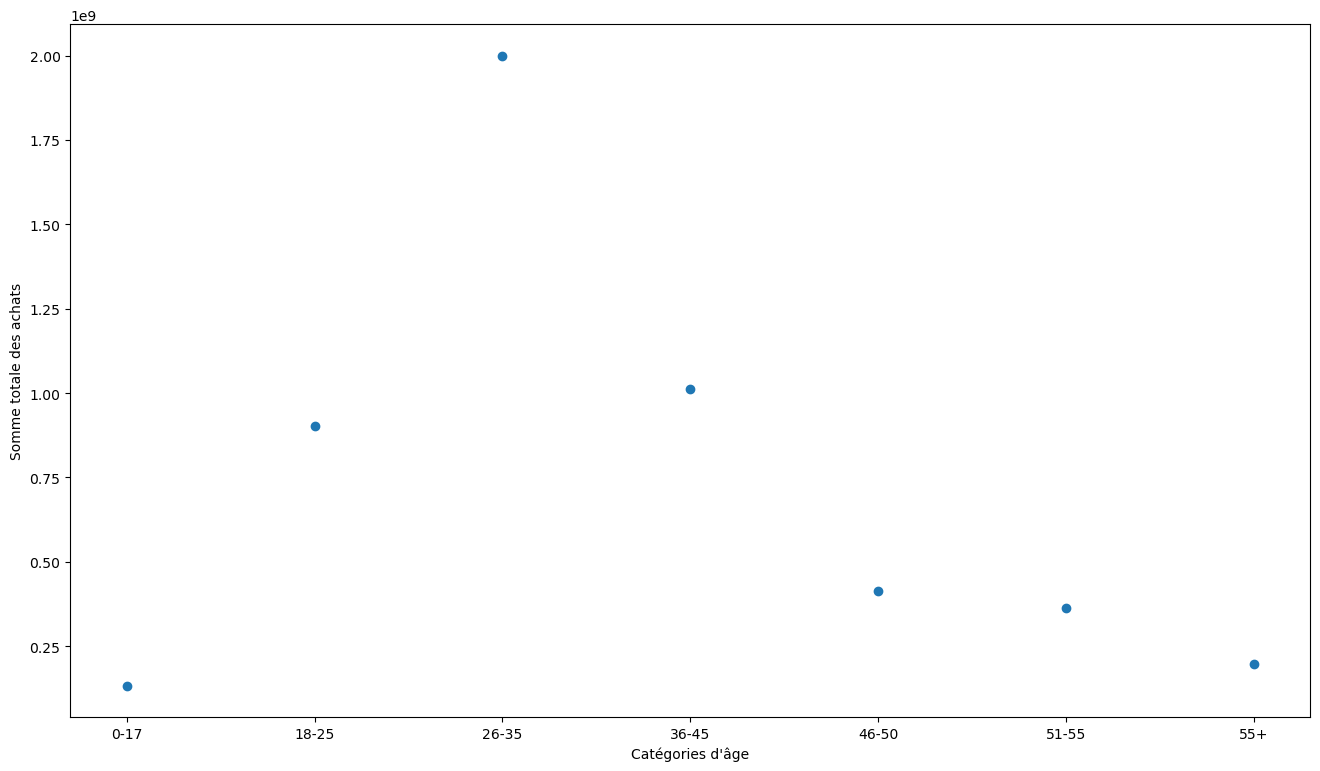

In [76]:
# Ajouter des marqueurs de type point sans tracer les lignes et ajouter des étiquettes
plt.plot(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker='o', linestyle="")
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des achats")
plt.show()

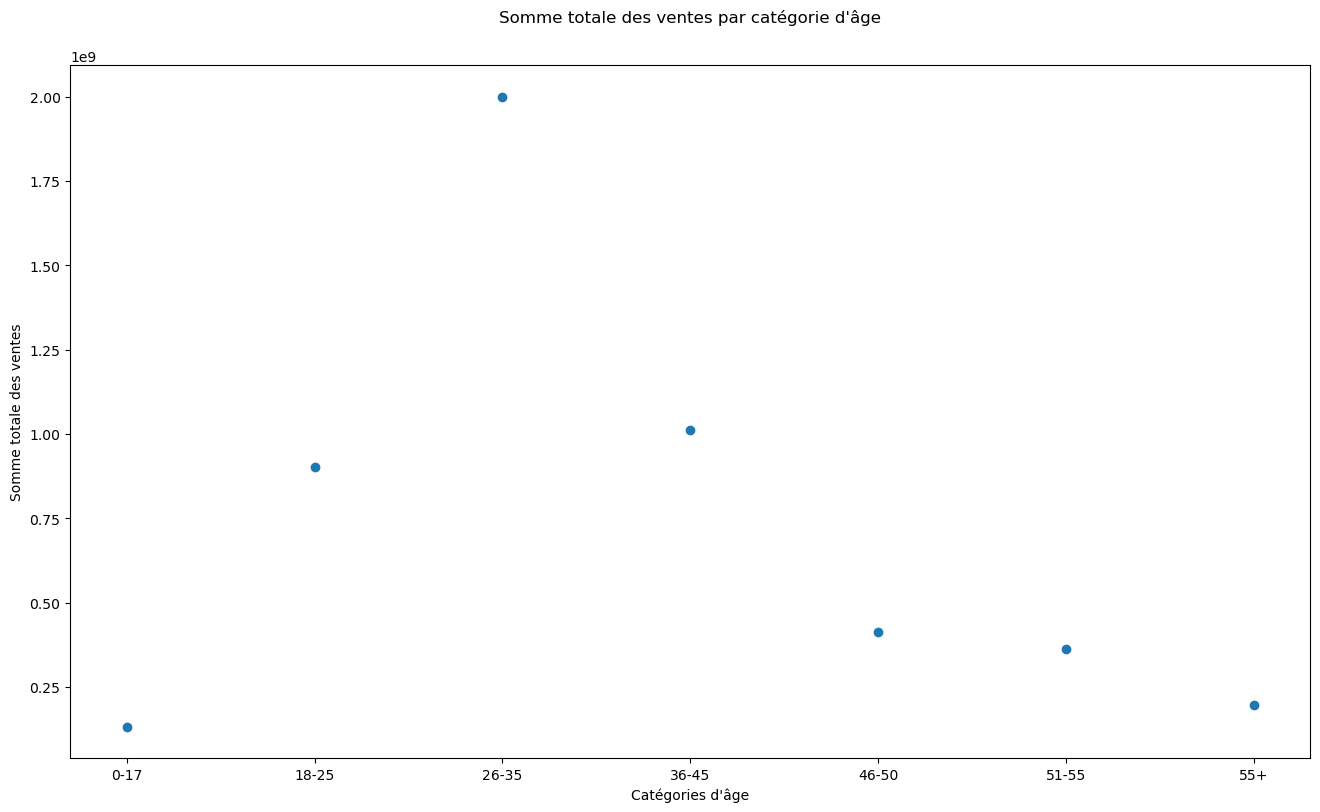

In [77]:
# Ajouter des marqueurs de type point sans tracer les lignes, ajouter des étiquettes et un titre
plt.plot(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker='o', linestyle="")
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des ventes")
plt.title("Somme totale des ventes par catégorie d'âge", y=1.05)
plt.show()

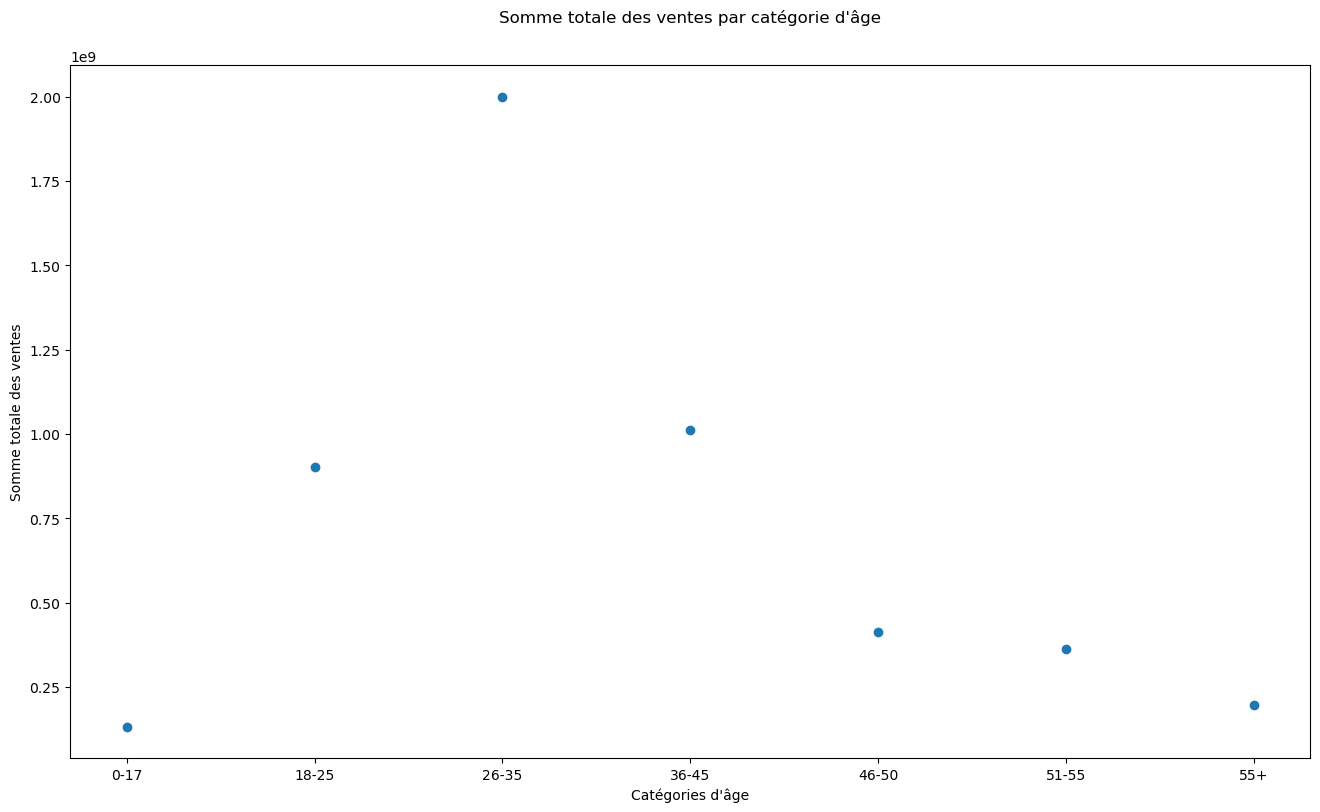

In [78]:
plt.scatter(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker="o")
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des ventes")
plt.title("Somme totale des ventes par catégorie d'âge", y=1.05) # y=1.05 pour ajuster le titre
plt.show()

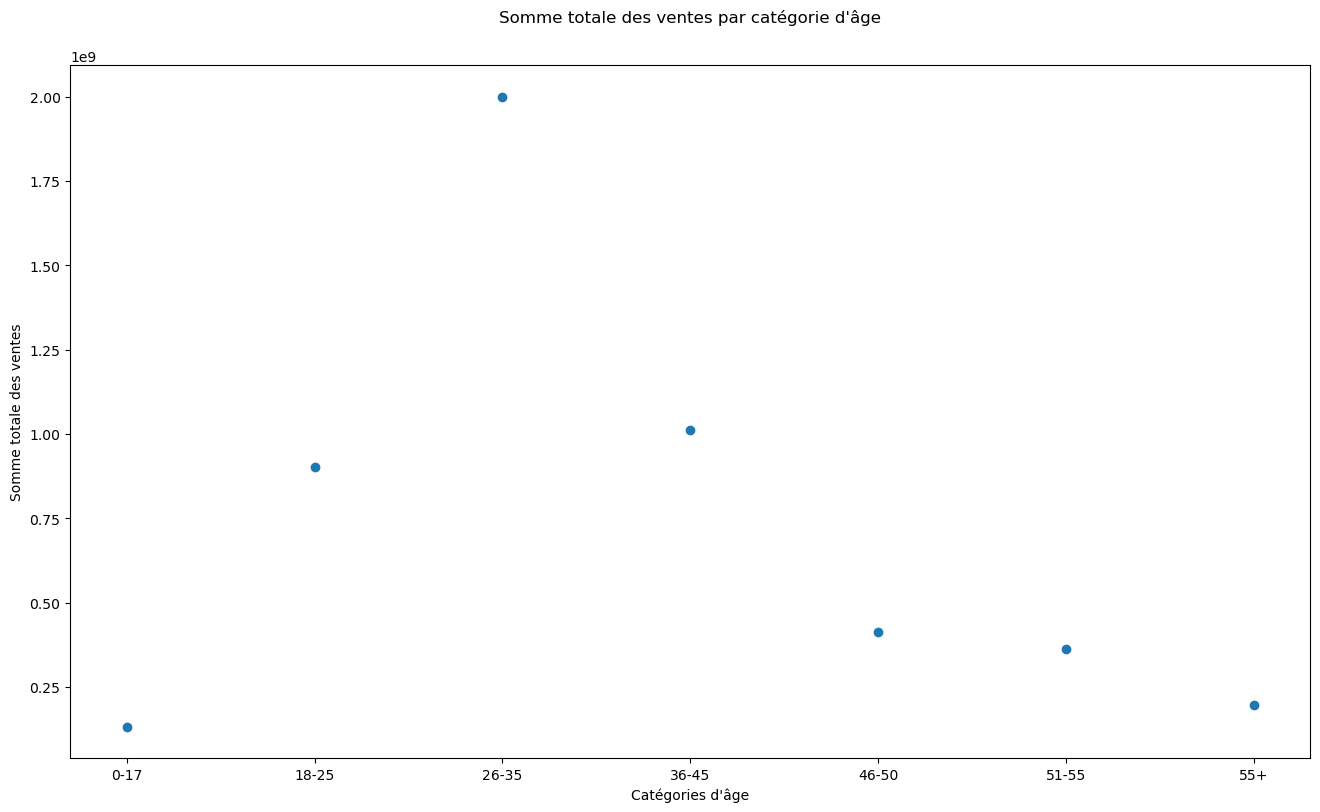

In [79]:
plt.rcParams["figure.figsize"] = (16, 9) # Ajuster la taille du graphique
plt.scatter(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker="o")
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des ventes")
plt.title("Somme totale des ventes par catégorie d'âge", y=1.05)
plt.show()

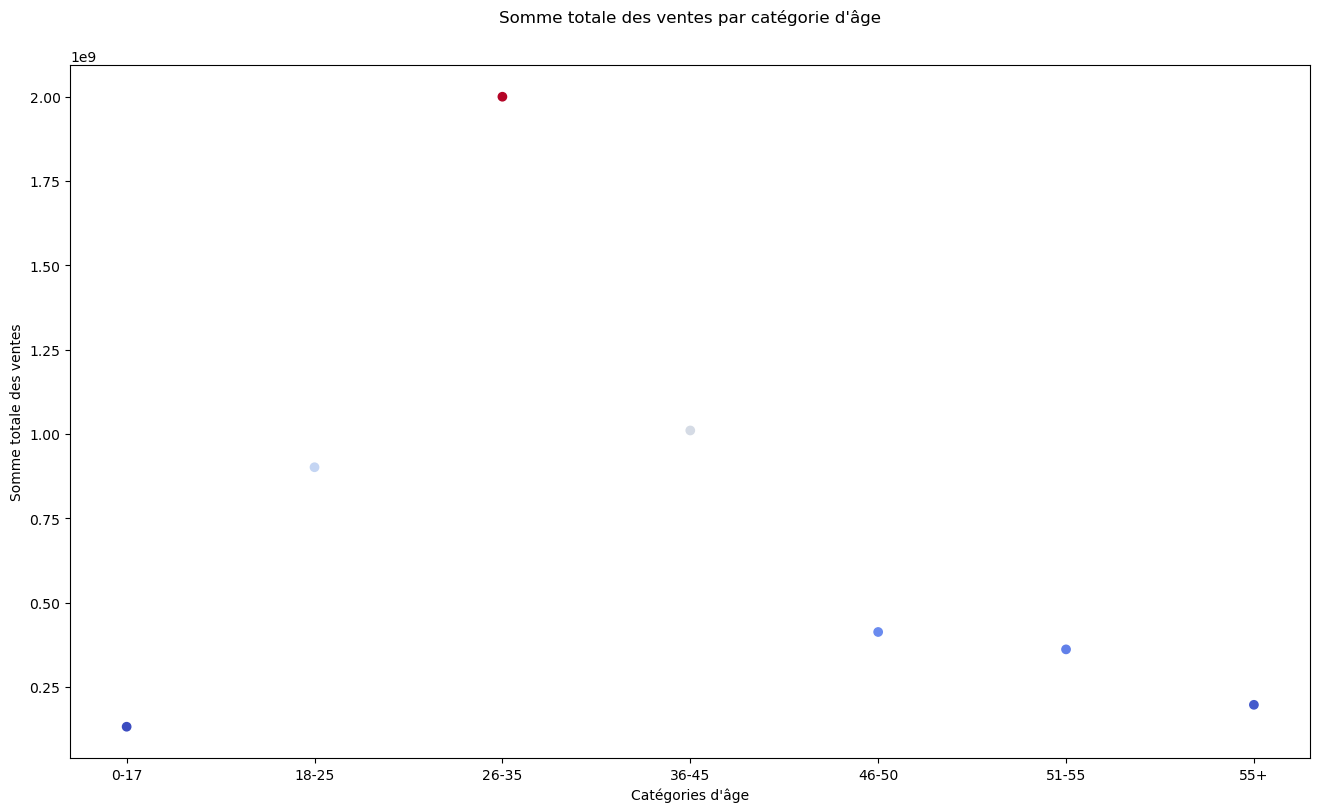

In [80]:
plt.rcParams["figure.figsize"] = (16, 9)
# Utiliser une colormap pour colorer les points en fonction de la valeur (ici coolwarm)
plt.scatter(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker="o", c=list(montants_totaux_achats_par_age.values()), cmap="coolwarm")
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des ventes")
plt.title("Somme totale des ventes par catégorie d'âge", y=1.05)
plt.show()

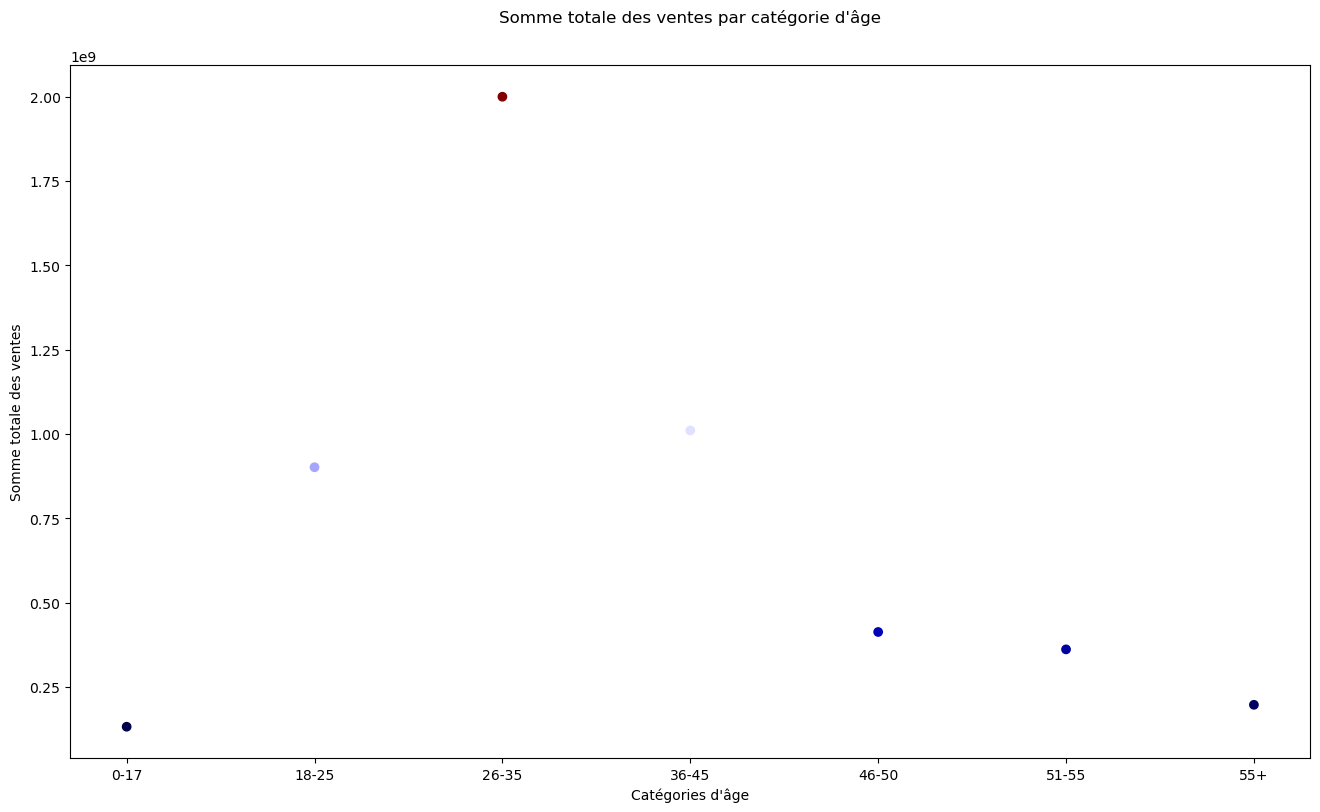

In [81]:
plt.rcParams["figure.figsize"] = (16, 9)
# Utiliser une colormap pour colorer les points en fonction de la valeur (ici seismic)
plt.scatter(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker="o", c=list(montants_totaux_achats_par_age.values()), cmap="seismic")
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des ventes")
plt.title("Somme totale des ventes par catégorie d'âge", y=1.05)
plt.show()

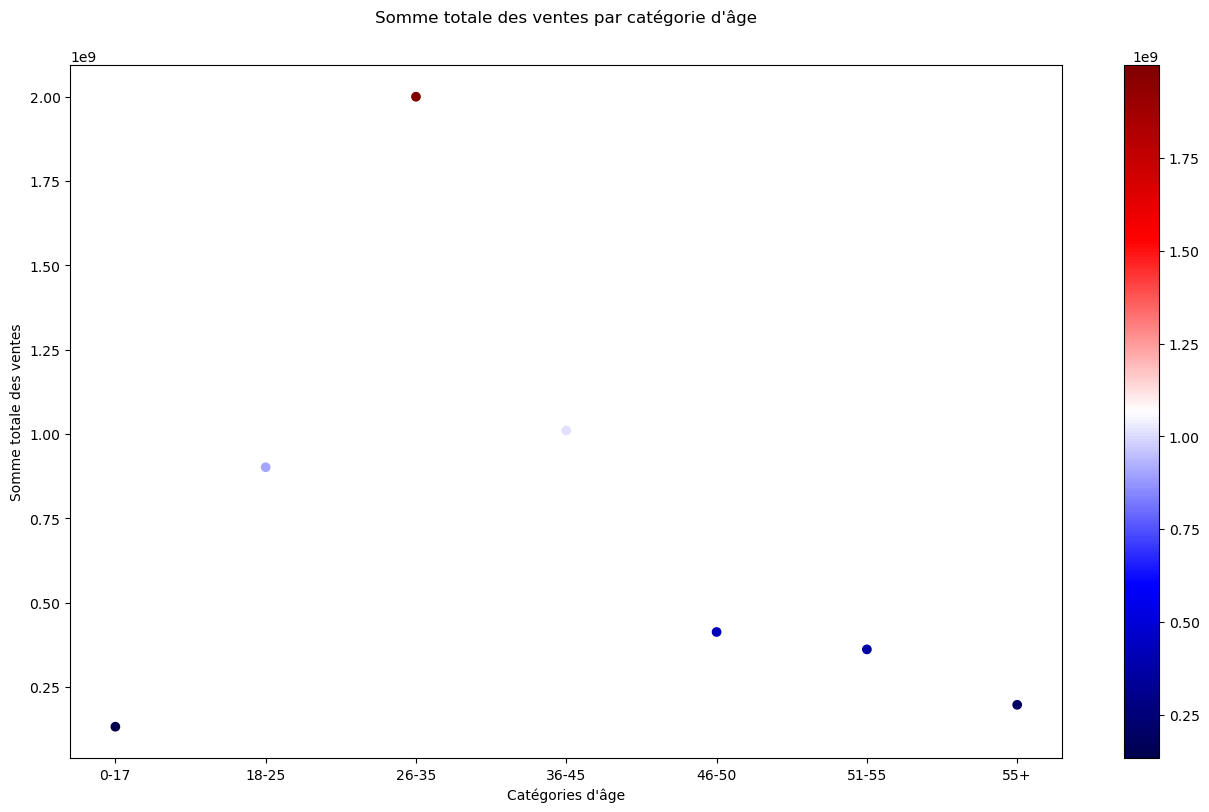

In [82]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.scatter(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker="o", c=list(montants_totaux_achats_par_age.values()), cmap="seismic")
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des ventes")
plt.title("Somme totale des ventes par catégorie d'âge", y=1.05)
plt.colorbar() # Ajouter une légende pour la colormap
plt.show()

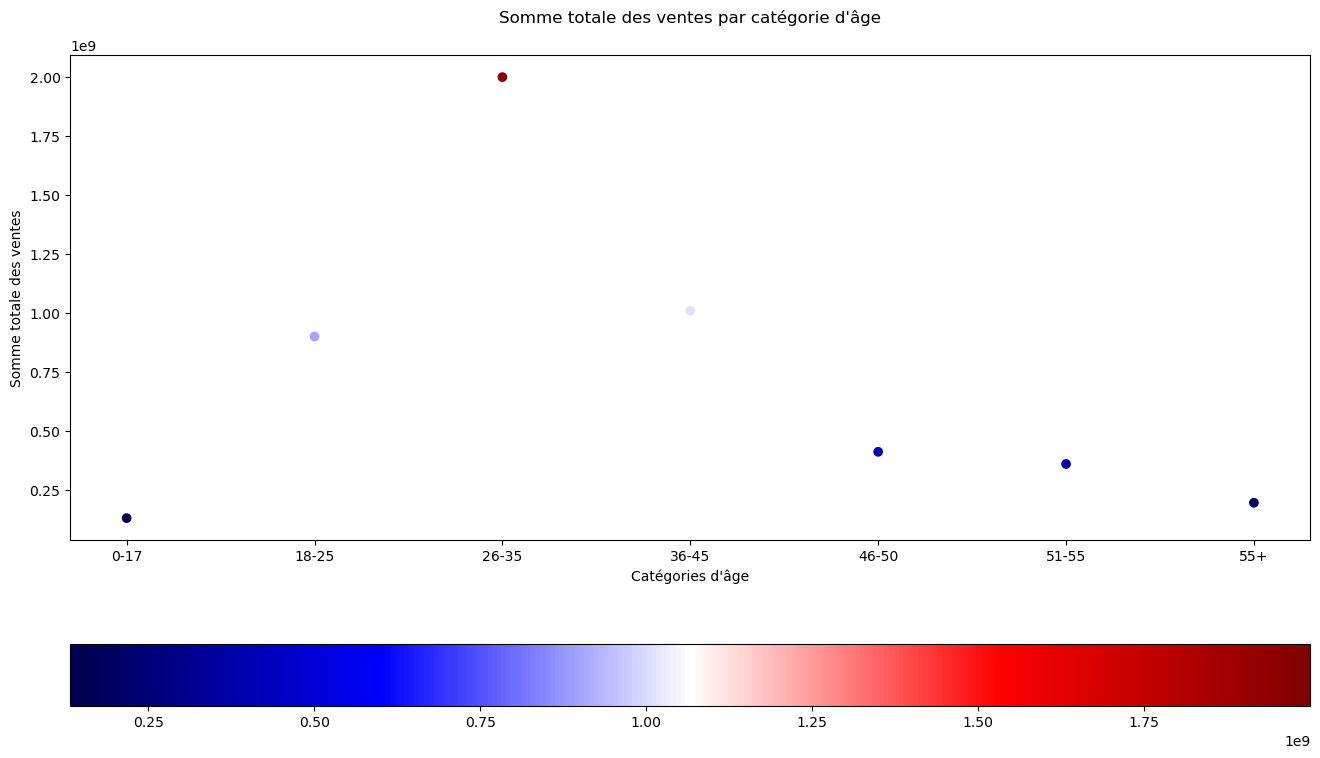

In [83]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.scatter(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker="o", c=list(montants_totaux_achats_par_age.values()), cmap="seismic")
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des ventes")
plt.title("Somme totale des ventes par catégorie d'âge", y=1.05)
plt.colorbar(orientation="horizontal") # Ajouter une légende pour la colormap en horizontal
plt.show()

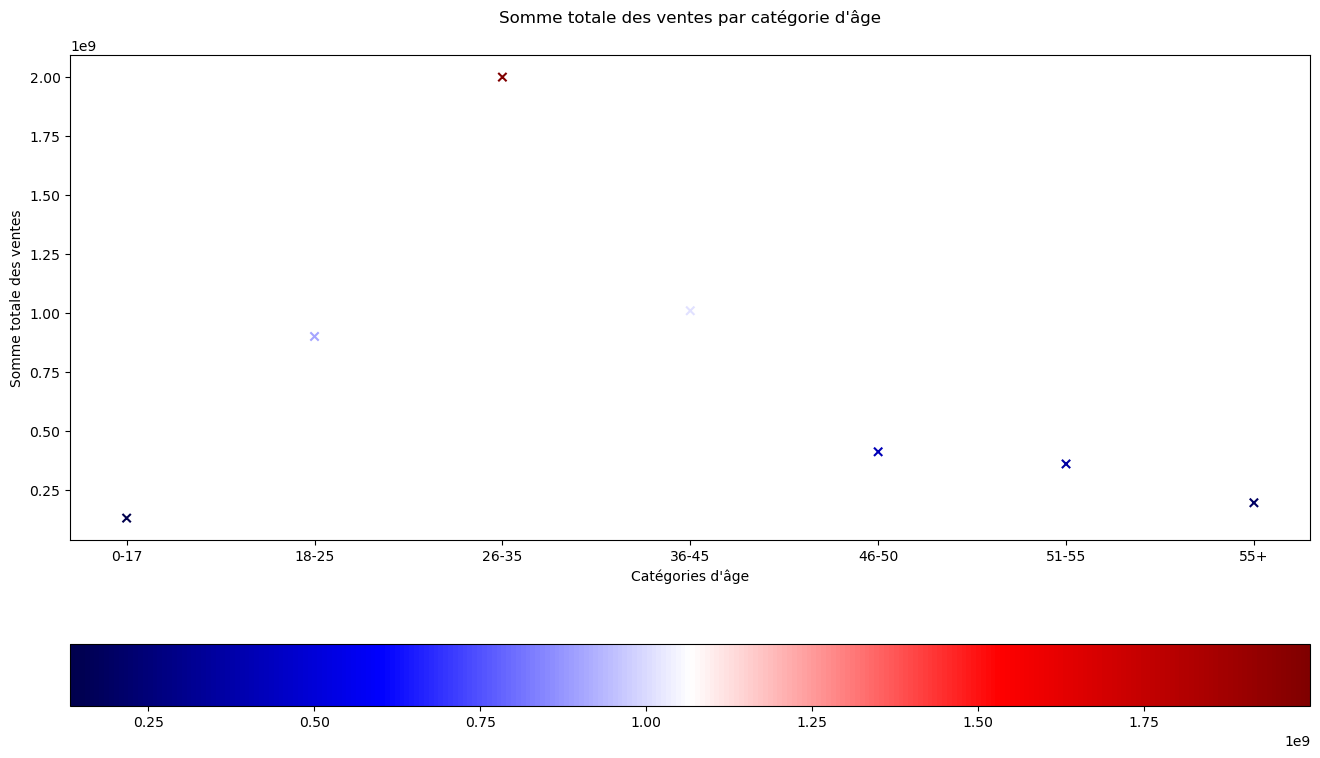

In [84]:
plt.rcParams["figure.figsize"] = (16, 9)
# Utiliser des croix à la place des points
plt.scatter(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker="x", c=list(montants_totaux_achats_par_age.values()), cmap="seismic")
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des ventes")
plt.title("Somme totale des ventes par catégorie d'âge", y=1.05)
plt.colorbar(orientation="horizontal")
plt.show()

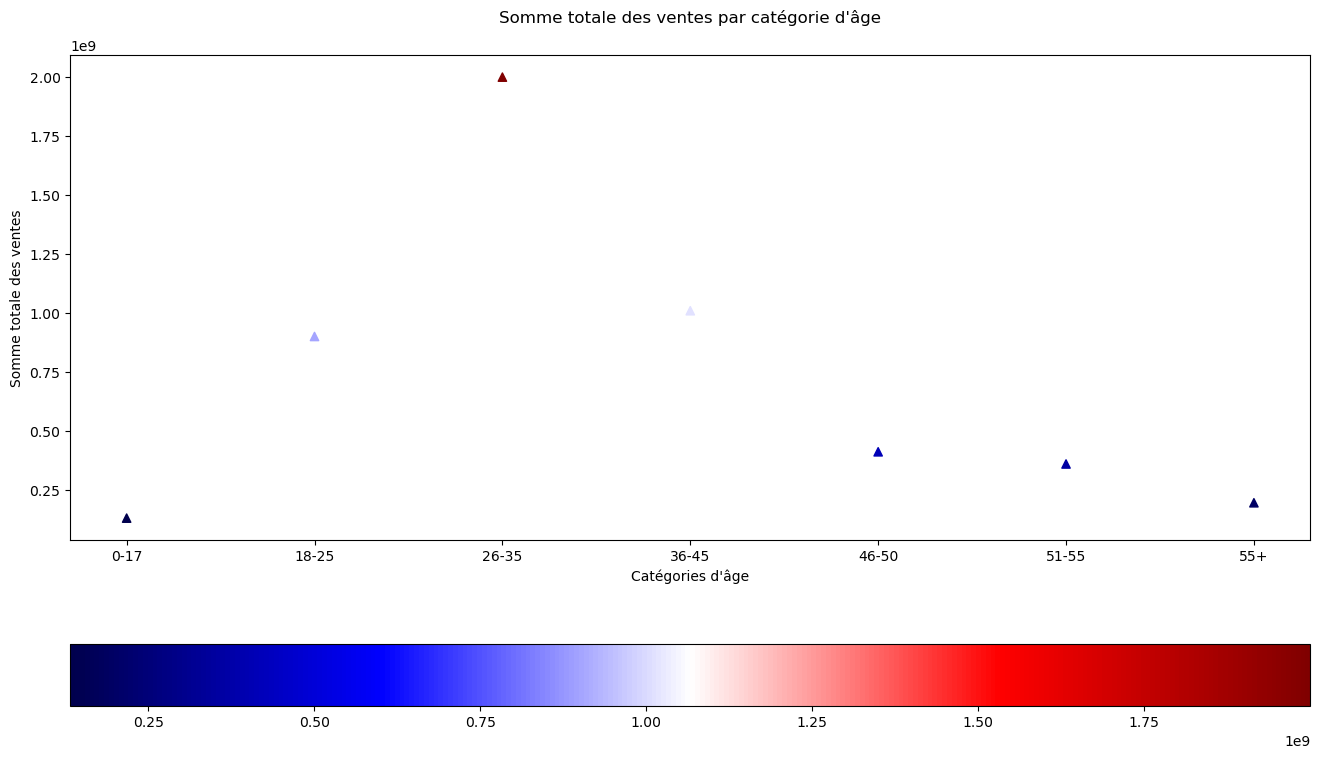

In [85]:
plt.rcParams["figure.figsize"] = (16, 9)
# Utiliser des triangles à la place des points
plt.scatter(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker="^", c=list(montants_totaux_achats_par_age.values()), cmap="seismic")
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des ventes")
plt.title("Somme totale des ventes par catégorie d'âge", y=1.05)
plt.colorbar(orientation="horizontal")
plt.show()

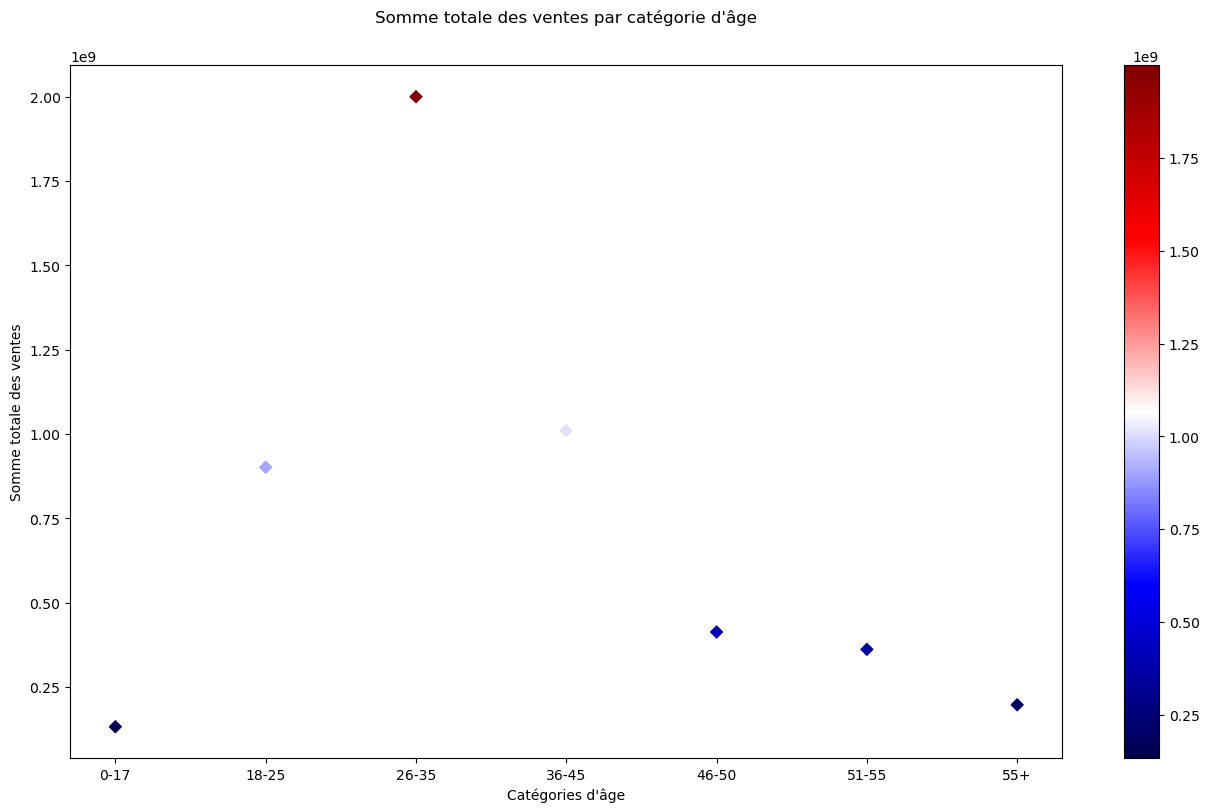

In [86]:
plt.rcParams["figure.figsize"] = (16, 9)
# Utiliser des losanges à la place des points
plt.scatter(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker="D", c=list(montants_totaux_achats_par_age.values()), cmap="seismic")
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des ventes")
plt.title("Somme totale des ventes par catégorie d'âge", y=1.05)
plt.colorbar()
plt.show()

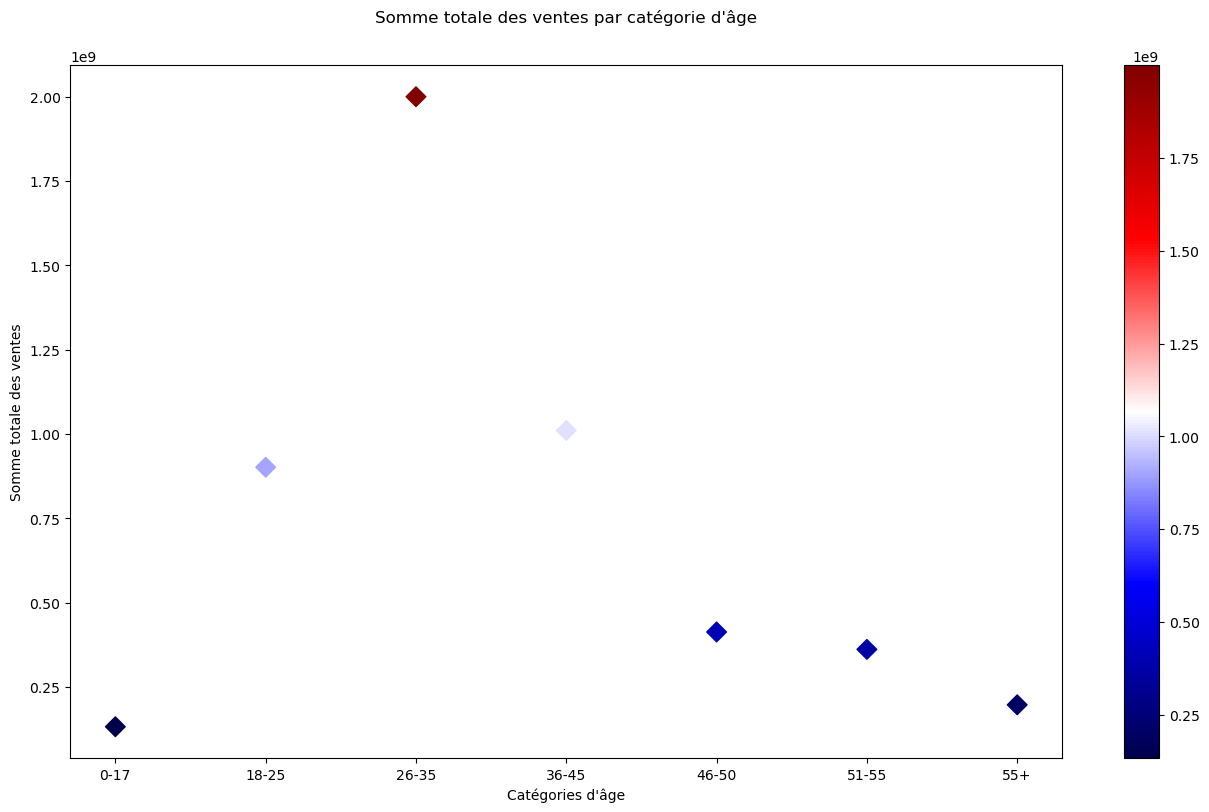

In [87]:
plt.rcParams["figure.figsize"] = (16, 9)
# Ajuster la taille des losanges
plt.scatter(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker="D", c=list(montants_totaux_achats_par_age.values()), cmap="seismic", s=100)
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des ventes")
plt.title("Somme totale des ventes par catégorie d'âge", y=1.05)
plt.colorbar()
plt.show()

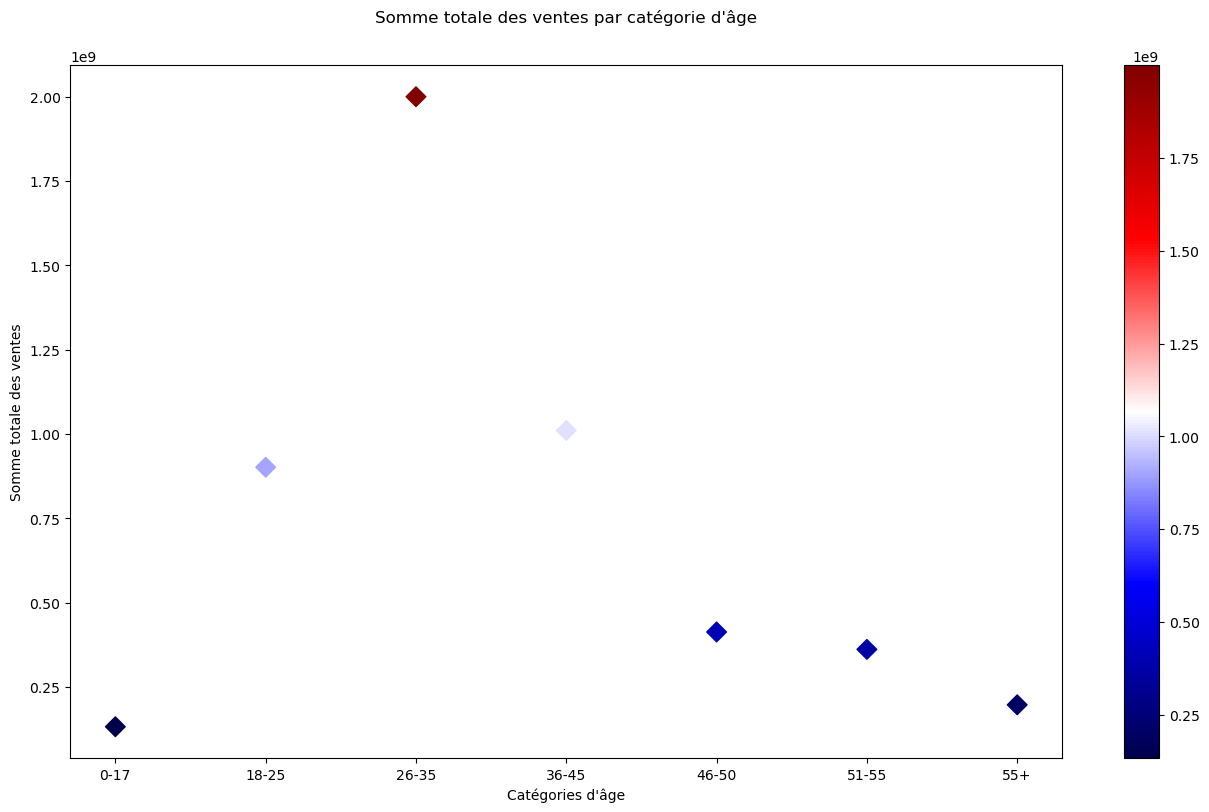

In [88]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.scatter(montants_totaux_achats_par_age.keys(), montants_totaux_achats_par_age.values(), marker="D", c=list(montants_totaux_achats_par_age.values()), cmap="seismic", s=100)
plt.xlabel("Catégories d'âge")
plt.ylabel("Somme totale des ventes")
plt.title("Somme totale des ventes par catégorie d'âge", y=1.05)
plt.colorbar()
# Sauvegarder le graphique dans un fichier image PNG
plt.savefig("somme_totale_ventes_par_age.png", format="png", bbox_inches="tight") # bbox_inches="tight" permet de ne pas couper le titre
plt.show()
plt.close()

### > Les autres types de graphiques <

### Diagramme à barres

In [89]:
data_bar = black_friday["Gender"].value_counts()
data_bar

Gender
M    405380
F    132197
Name: count, dtype: int64

In [90]:
type(data_bar)

pandas.core.series.Series

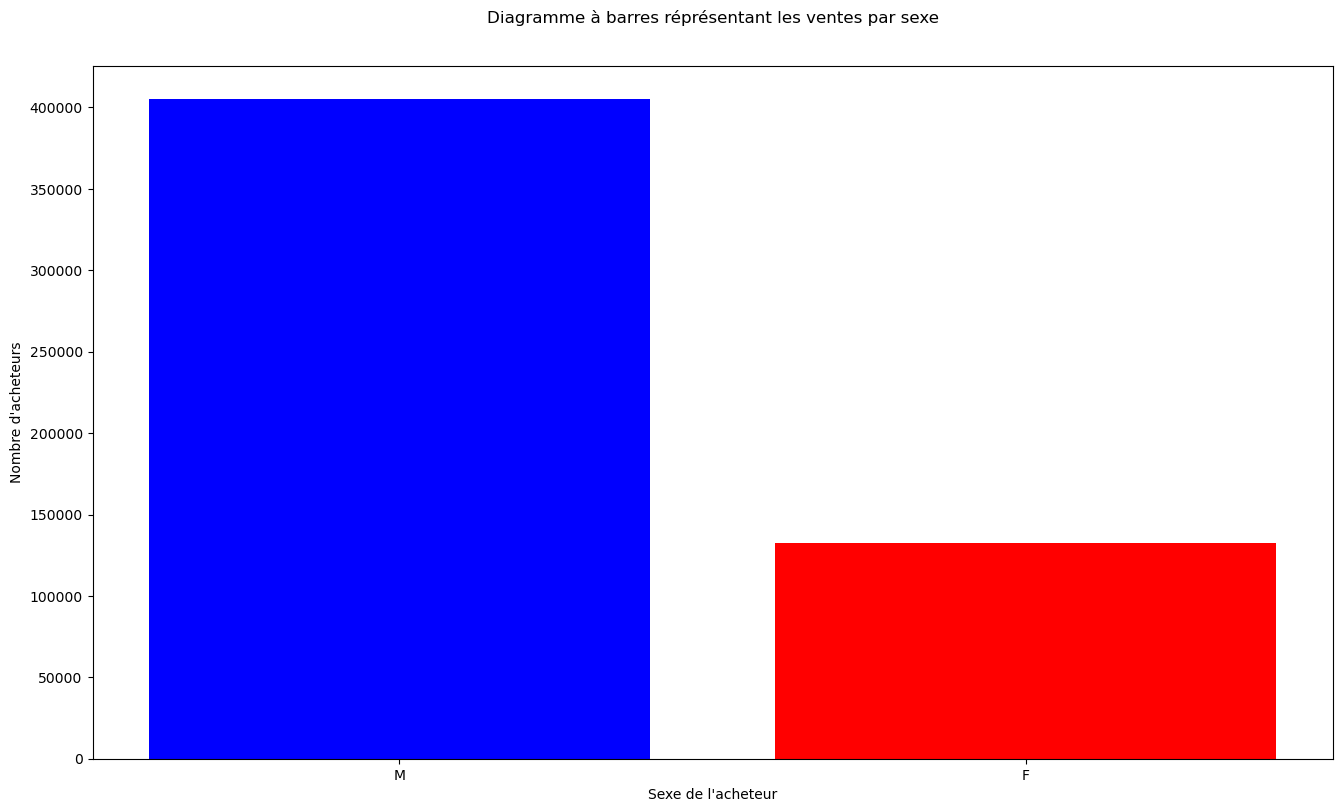

In [91]:
# Tracer un diagramme à barres
plt.rcParams["figure.figsize"] = (16, 9)
plt.bar(data_bar.index, data_bar.values, color=["blue", "red"])
plt.xlabel("Sexe de l'acheteur")
plt.ylabel("Nombre d'acheteurs")
plt.title("Diagramme à barres réprésentant les ventes par sexe", y=1.05)
plt.show()

### Diagramme en boîte

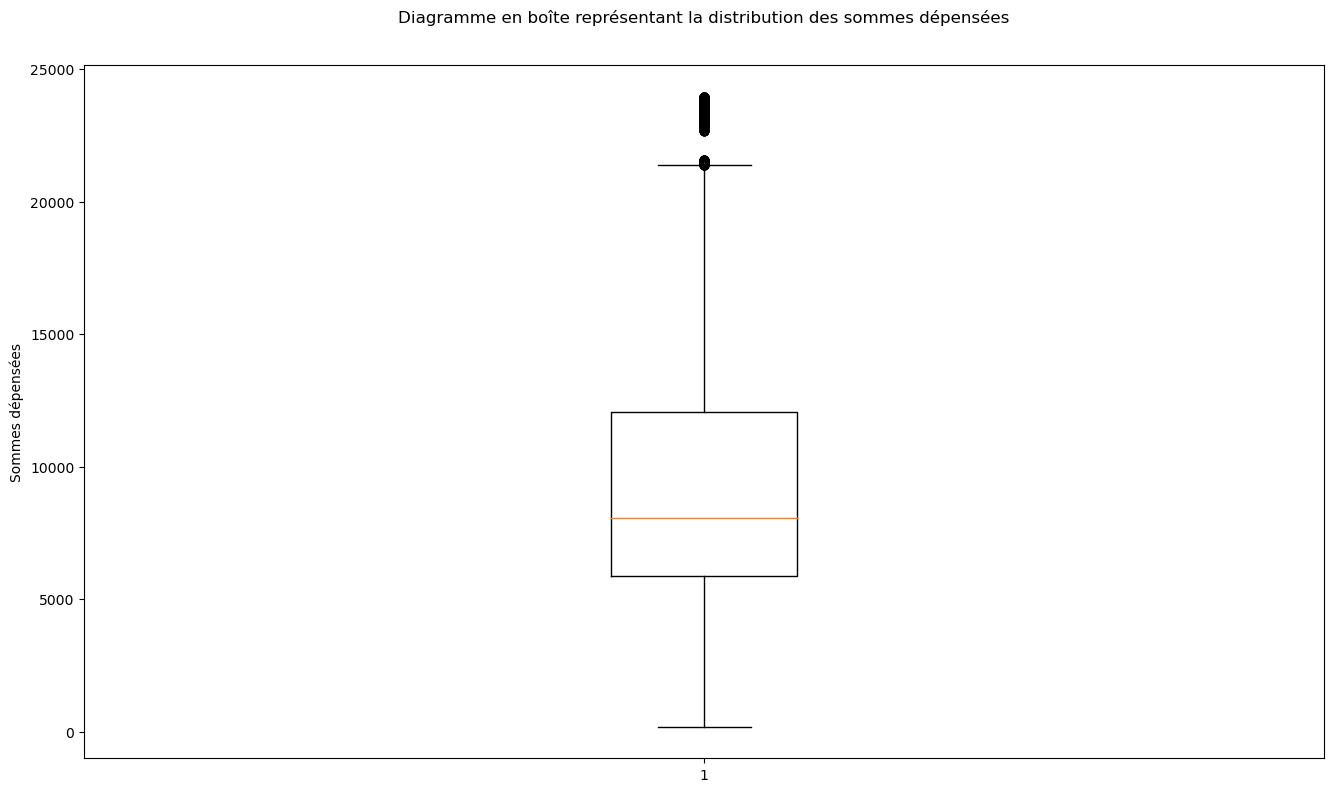

In [92]:
# Tracer un diagramme en boîte
plt.rcParams["figure.figsize"] = (16, 9)
plt.boxplot(black_friday["Purchase"])
plt.ylabel("Sommes dépensées")
plt.title("Diagramme en boîte représentant la distribution des sommes dépensées", y=1.05)
plt.show()

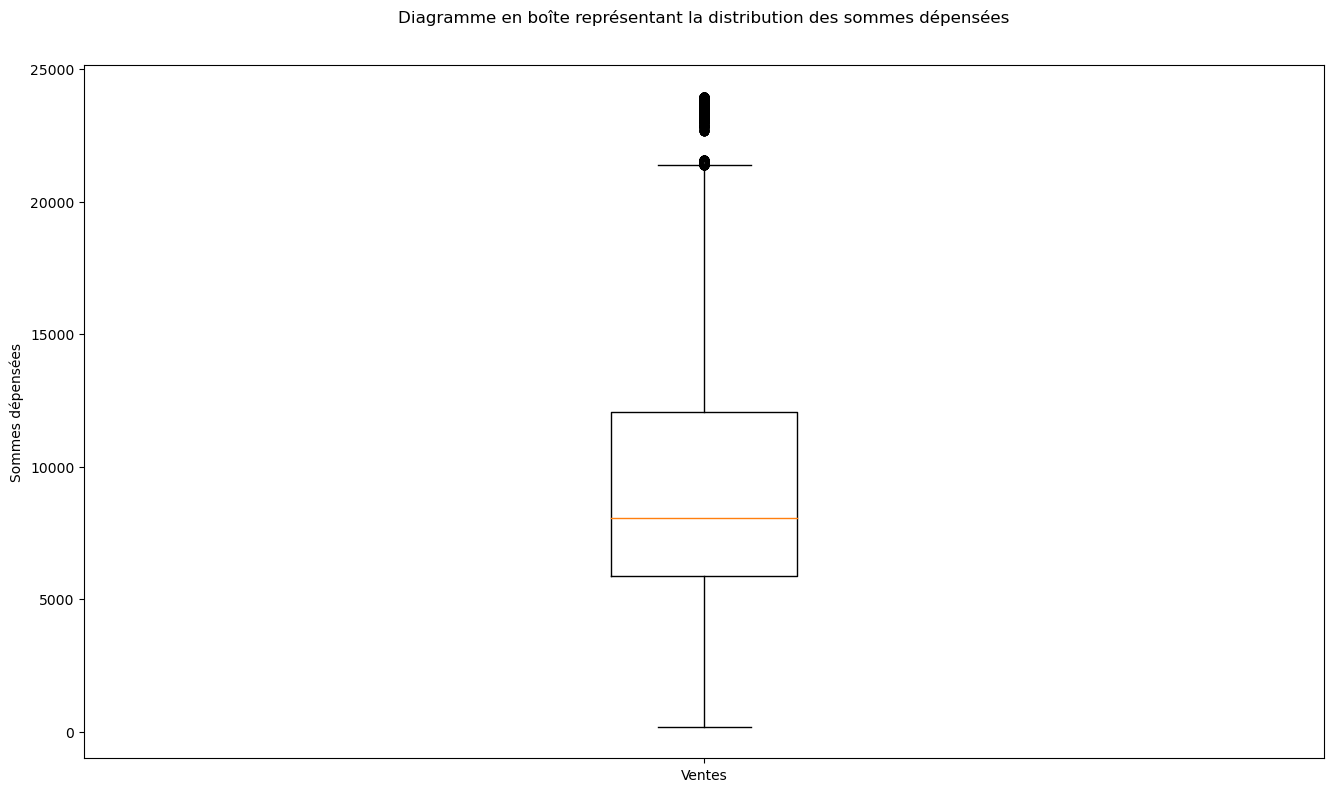

In [93]:
# Tracer un diagramme en boîte
plt.rcParams["figure.figsize"] = (16, 9)
plt.boxplot(black_friday["Purchase"])
plt.xticks([1], ["Ventes"]) # Renommer l'axe des abscisses
plt.ylabel("Sommes dépensées")
plt.title("Diagramme en boîte représentant la distribution des sommes dépensées", y=1.05)
plt.show()

### Diagramme circulaire

In [94]:
data_pie = black_friday["Age"].value_counts()
data_pie

Age
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: count, dtype: int64

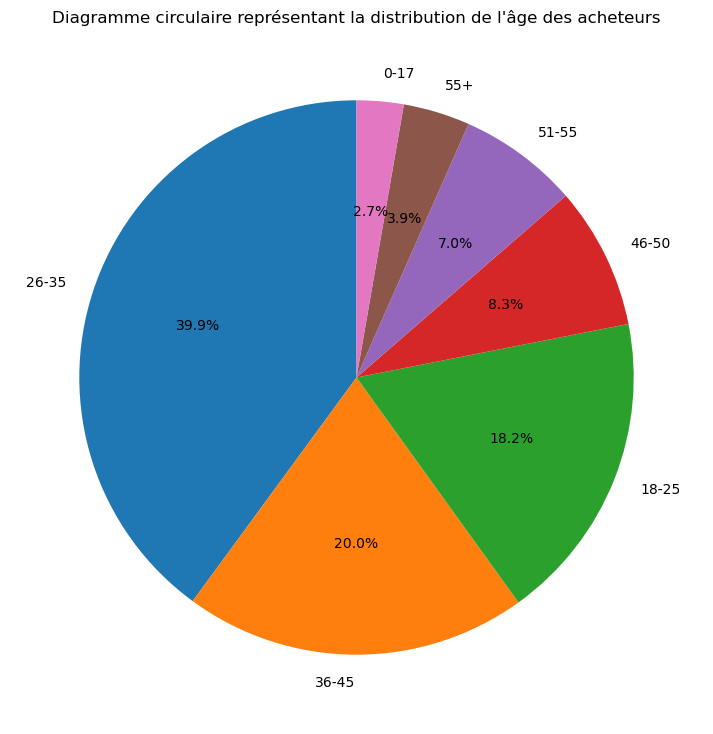

In [95]:
# Tracer un diagramme circulaire
plt.rcParams["figure.figsize"] = (9, 9)
plt.pie(data_pie.values, labels=data_pie.index, autopct="%1.1f%%", startangle=90)
plt.title("Diagramme circulaire représentant la distribution de l'âge des acheteurs", y=1)
plt.show()

### Combinaison de graphiques avec Matplotlib

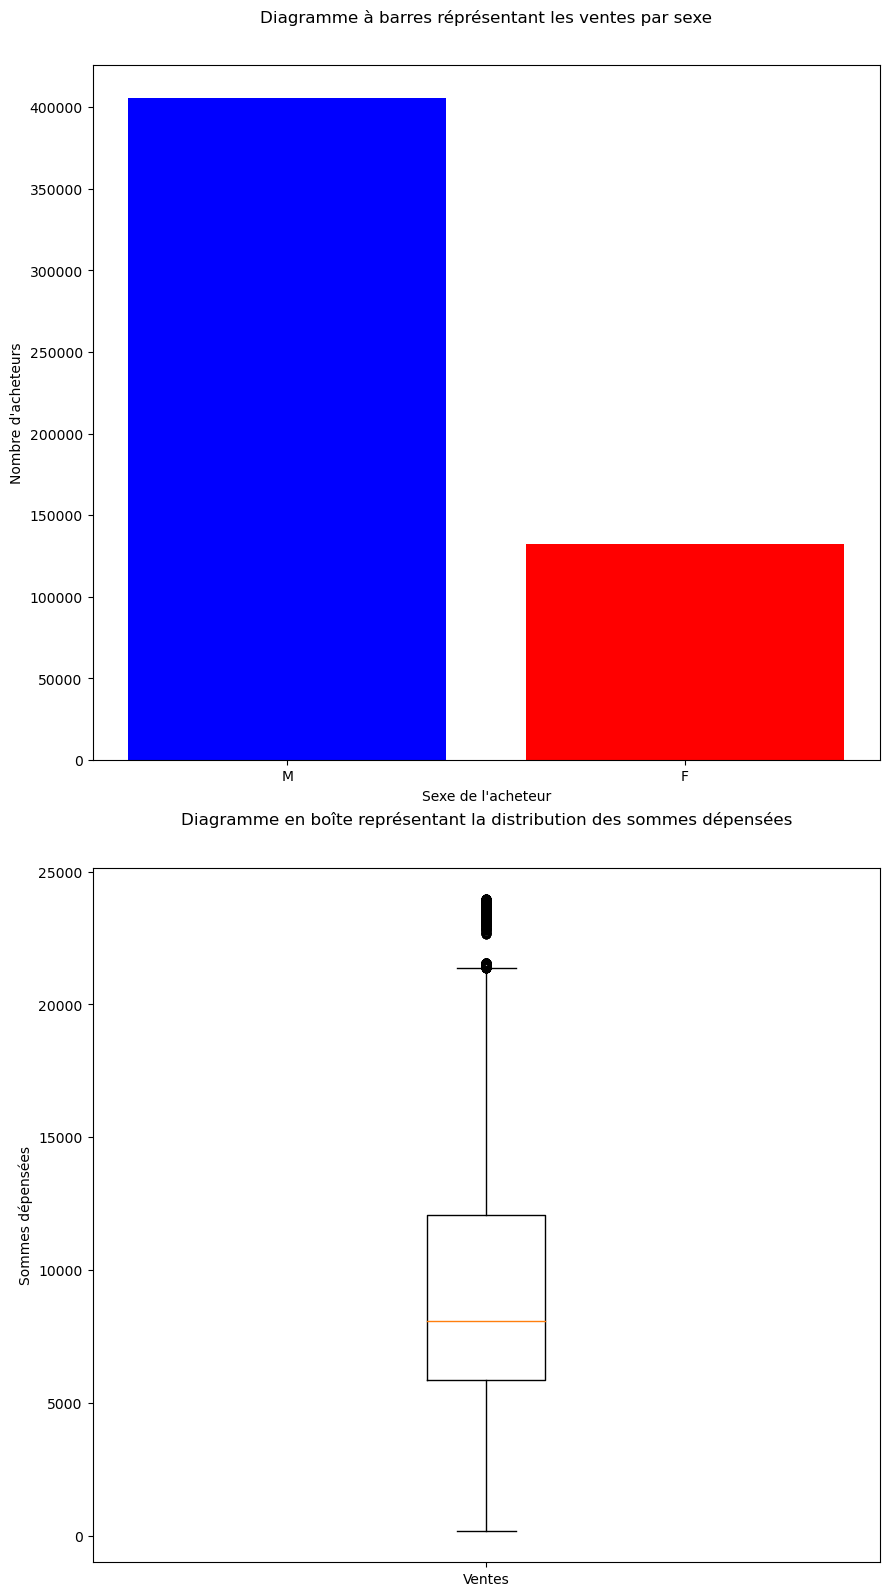

In [96]:
# Combiner deux graphiques
plt.rcParams["figure.figsize"] = (9, 16) # 9 pouces de largeur, 16 pouces de hauteur

plt.subplot(2, 1, 1) # 2 lignes, 1 colonne, 1er graphique (en haut)
plt.bar(data_bar.index, data_bar.values, color=["blue", "red"])
plt.xlabel("Sexe de l'acheteur")
plt.ylabel("Nombre d'acheteurs")
plt.title("Diagramme à barres réprésentant les ventes par sexe", y=1.05)

plt.subplot(2, 1, 2) # 2 lignes, 1 colonne, 2ème graphique (en bas)
plt.boxplot(black_friday["Purchase"])
plt.xticks([1], ["Ventes"])
plt.ylabel("Sommes dépensées")
plt.title("Diagramme en boîte représentant la distribution des sommes dépensées", y=1.05)

plt.tight_layout() # Pour éviter que les graphiques se chevauchent
plt.show()

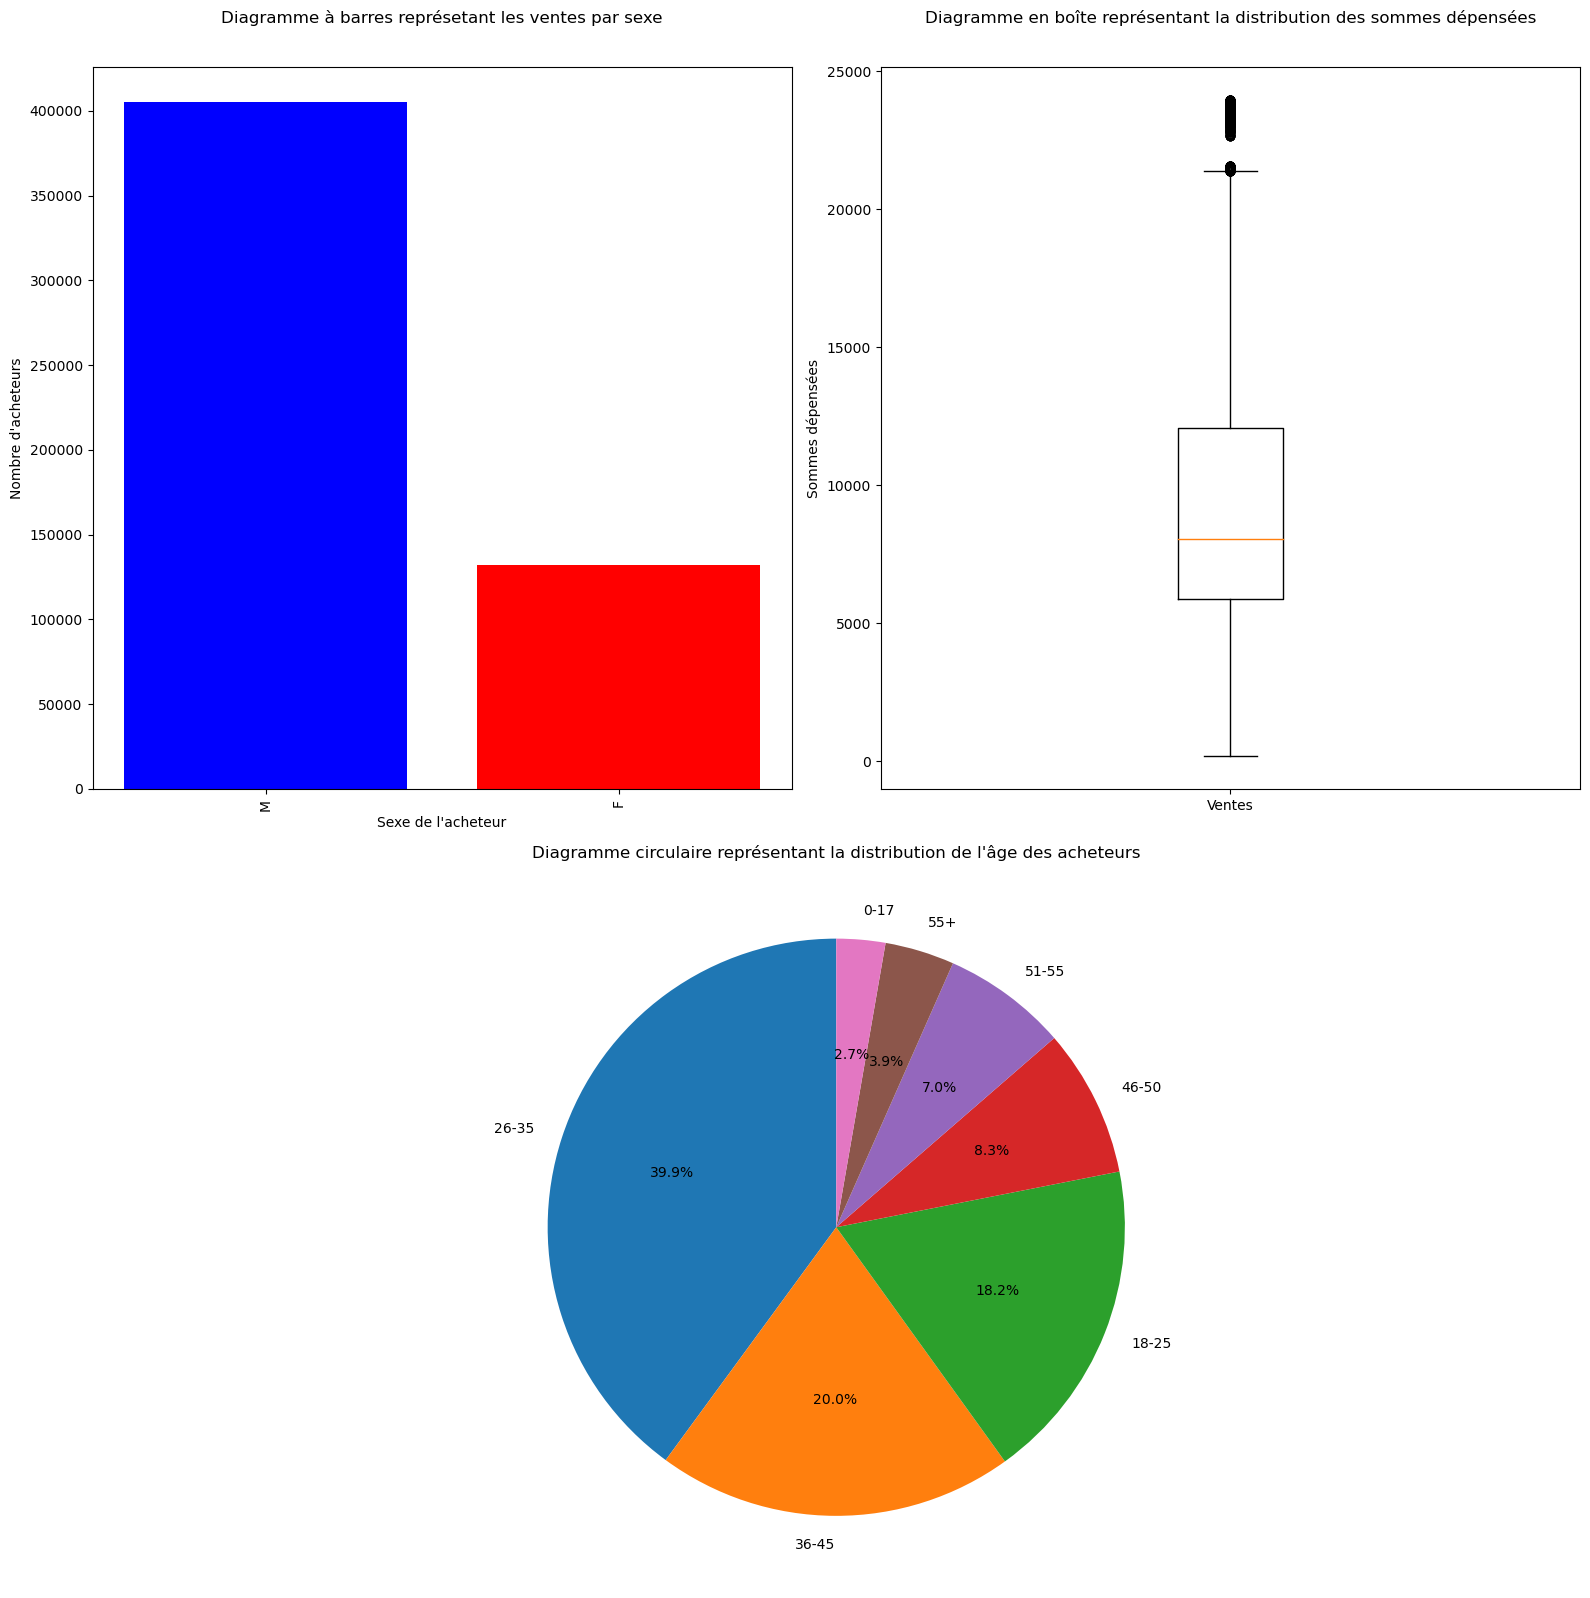

In [97]:
# Combiner trois graphiques
plt.rcParams["figure.figsize"] = (16, 16) # 16 pouces de largeur, 16 pouces de hauteur

plt.subplot(2, 2, 1) # 2 lignes, 2 colonnes, 1er graphique (en haut à gauche)
plt.bar(data_bar.index, data_bar.values, color=["blue", "red"])
plt.xlabel("Sexe de l'acheteur")
plt.ylabel("Nombre d'acheteurs")
plt.xticks(rotation="vertical")
plt.title("Diagramme à barres représetant les ventes par sexe", y=1.05)

plt.subplot(2, 2, 2) # 2 lignes, 2 colonnes, 2ème graphique (en haut à droite)
plt.boxplot(black_friday["Purchase"])
plt.xticks([1], ["Ventes"])
plt.ylabel("Sommes dépensées")
plt.title("Diagramme en boîte représentant la distribution des sommes dépensées", y=1.05)

plt.subplot(2, 1, 2) # 2 lignes, 1 colonne, 2ème graphique (en bas)
plt.pie(data_pie.values, labels=data_pie.index, autopct="%1.1f%%", startangle=90)
plt.title("Diagramme circulaire représentant la distribution de l'âge des acheteurs", y=1)

plt.tight_layout() # Pour éviter que les graphiques se chevauchent
plt.show()

## <font color="red">La visualisation des données avec la bibliothèque Seaborn</font>

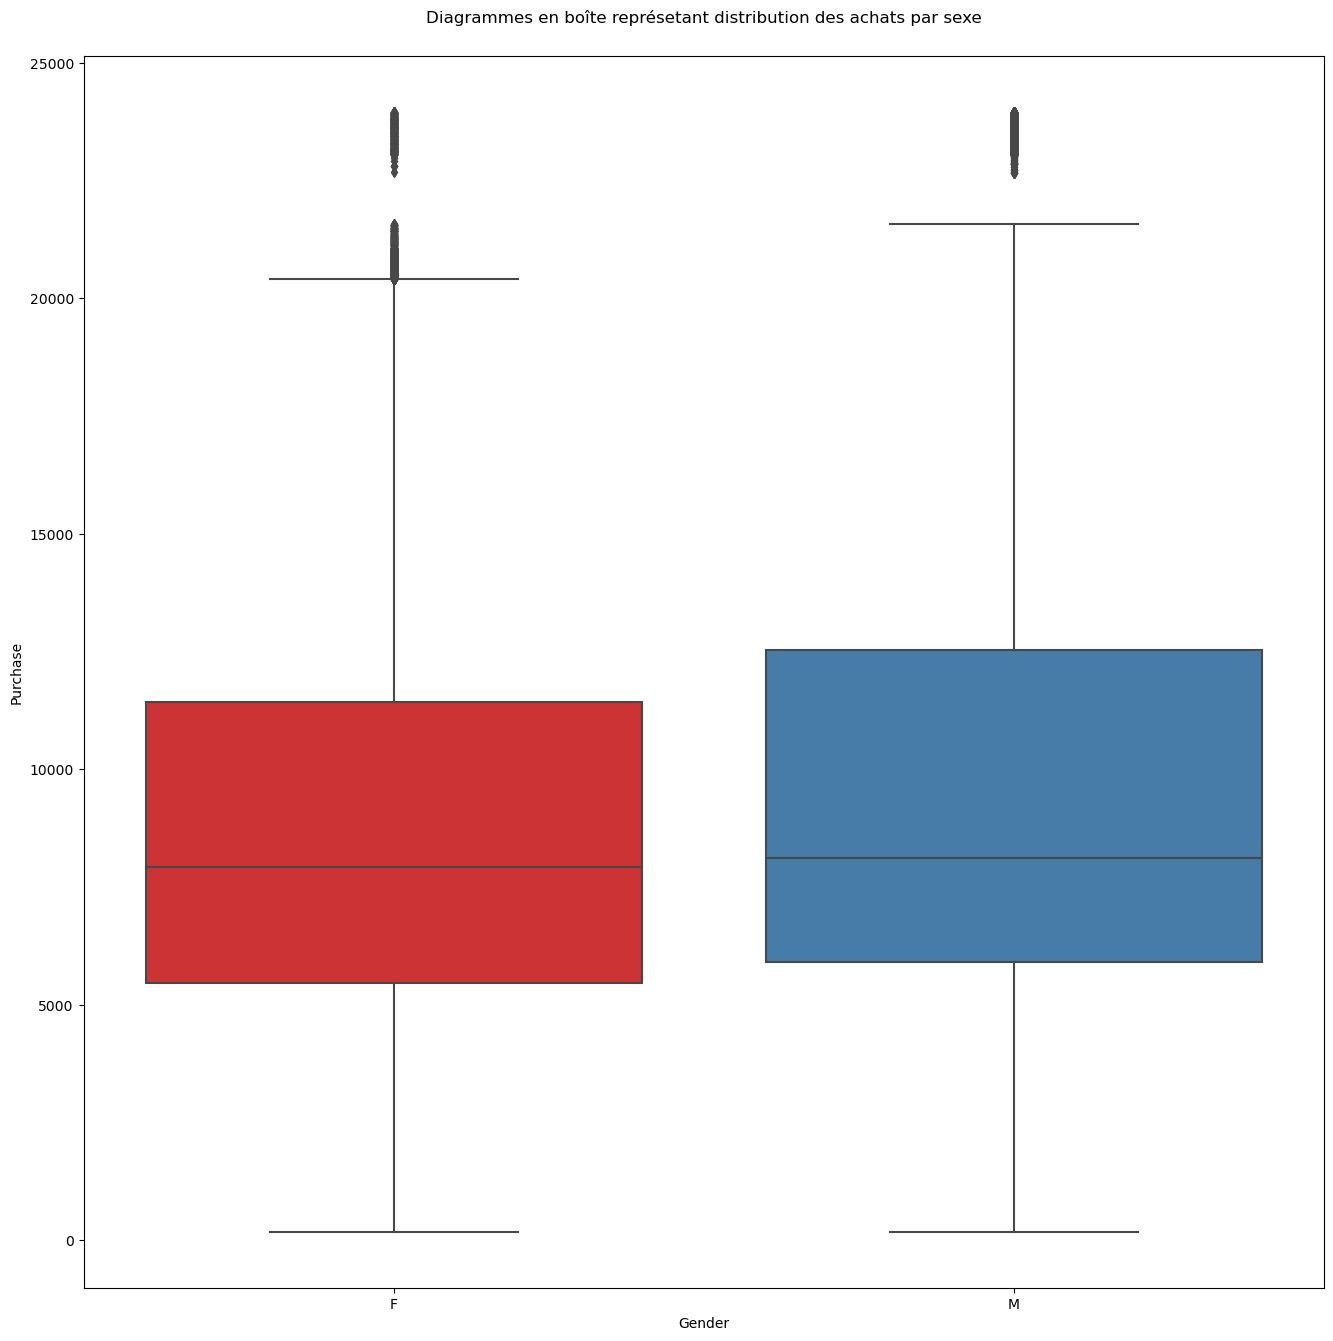

In [98]:
# Créer un diagramme en boîte par genre à l'aide de Seaborn
sns.boxplot(x="Gender", y="Purchase", data=black_friday, palette="Set1")
plt.title("Diagrammes en boîte représetant distribution des achats par sexe", y=1.02)
plt.show()

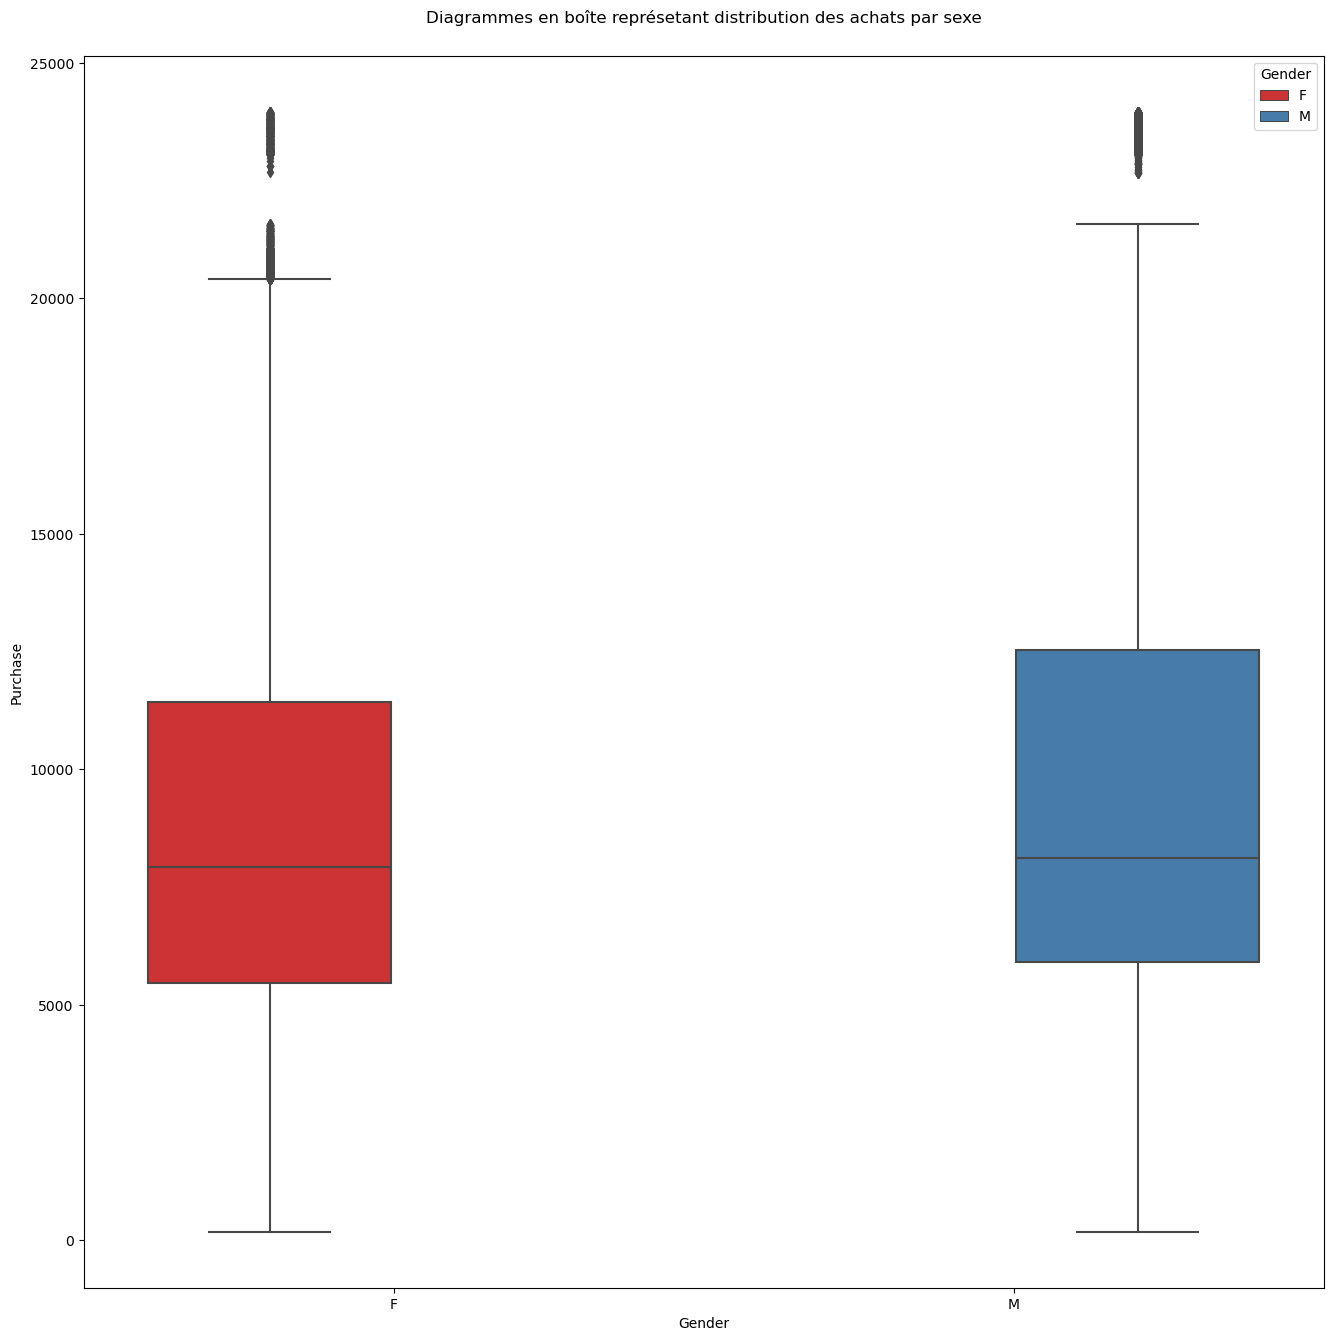

In [99]:
# Créer un diagramme en boîte par genre à l'aide de Seaborn en ajoutant une légende
sns.boxplot(x="Gender", y="Purchase", hue="Gender", data=black_friday, palette="Set1")
plt.title("Diagrammes en boîte représetant distribution des achats par sexe", y=1.02)
plt.show()

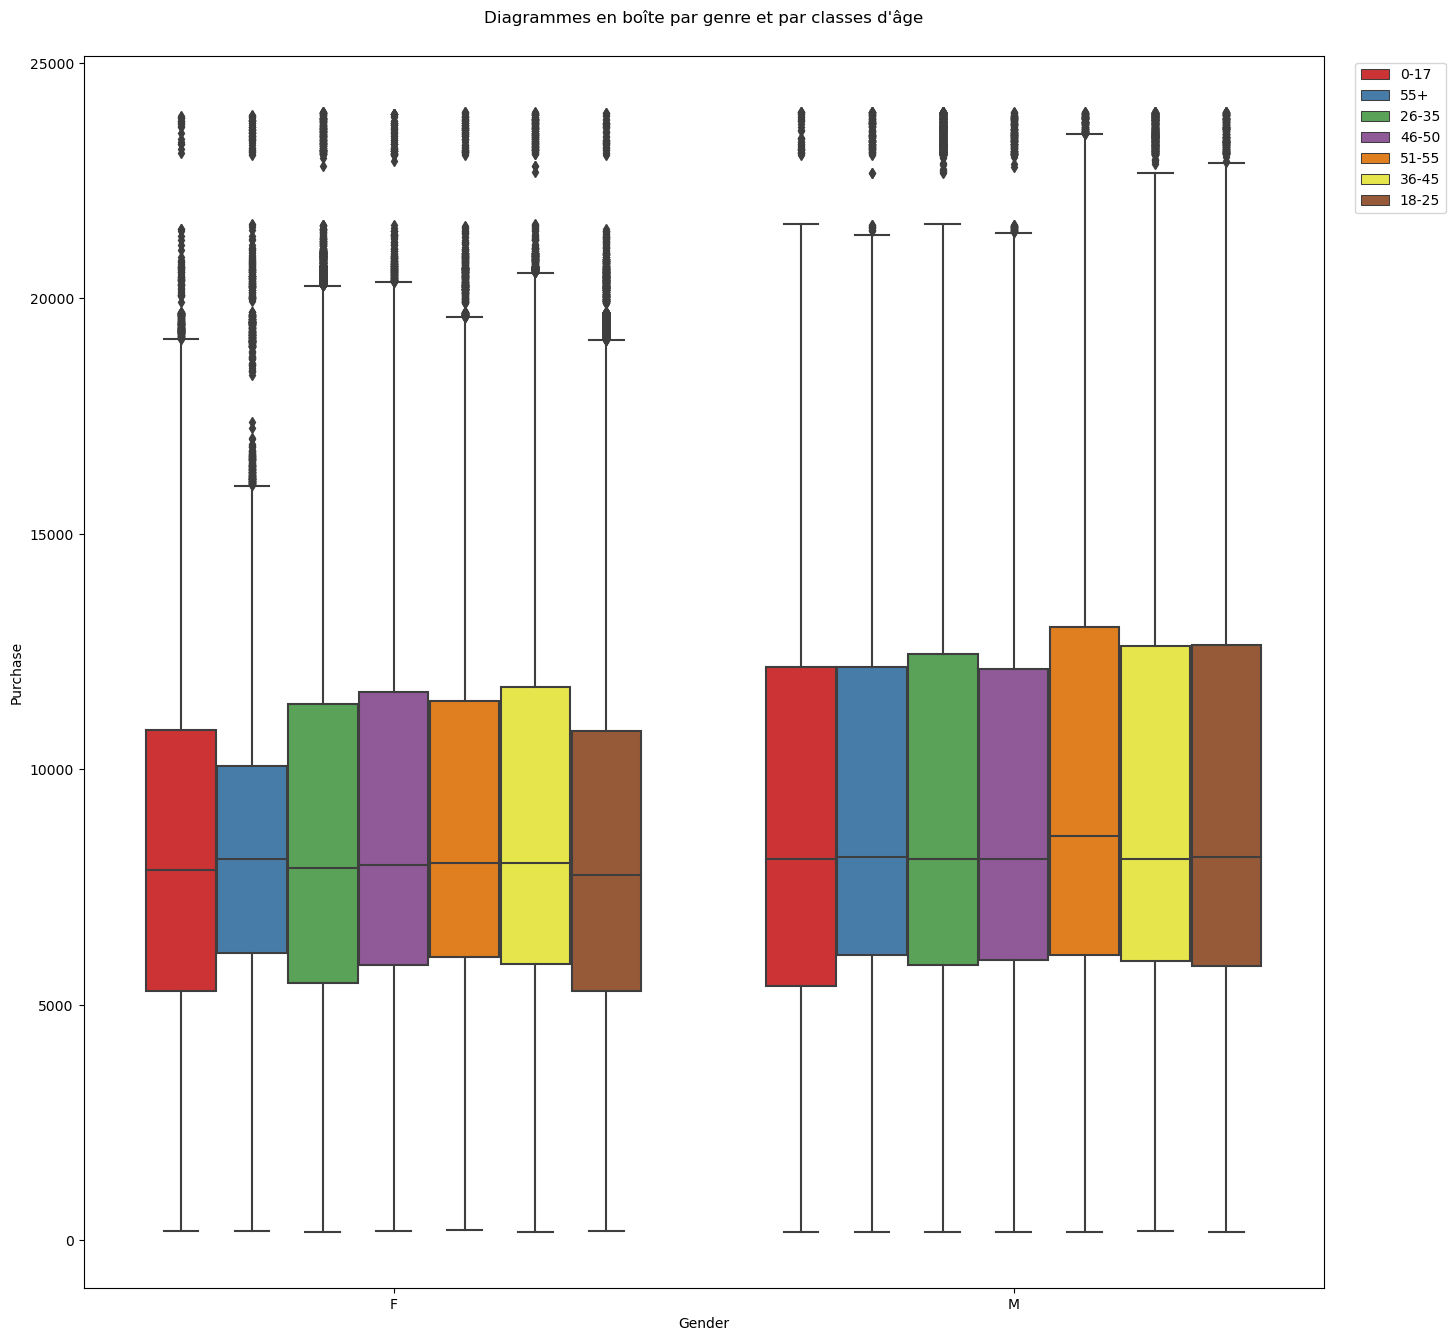

In [100]:
# Créer des diagrammes en boîte par genre et par classes d'âge à l'aide de Seaborn en ajoutant une légende
sns.boxplot(x="Gender", y="Purchase", hue="Age", data=black_friday, palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2) # Pour placer la légende en dehors du graphique
plt.title("Diagrammes en boîte par genre et par classes d'âge", y=1.02)
plt.show()

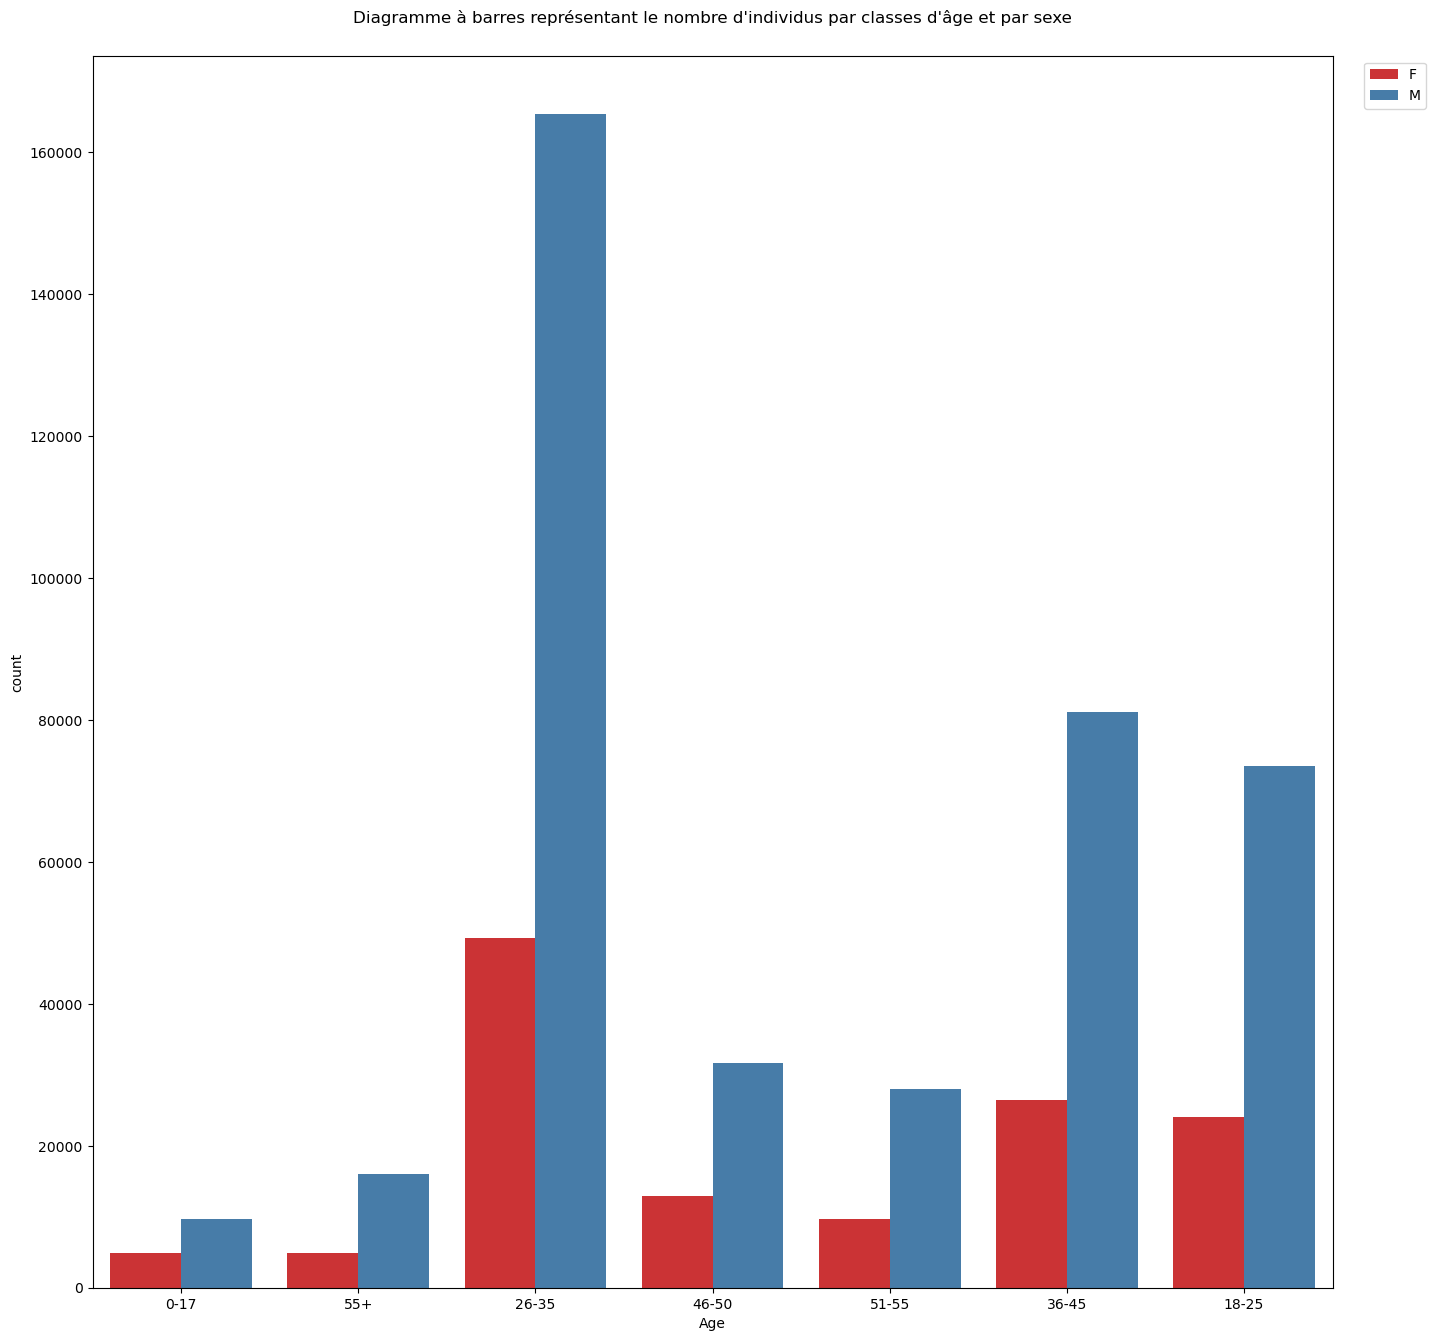

In [101]:
# Créer un diagramme à barres représentant le nombre d'individus par classes d'âge et par sexe
sns.countplot(x="Age", hue="Gender", data=black_friday, palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2) # Pour placer la légende en dehors du graphique
plt.title("Diagramme à barres représentant le nombre d'individus par classes d'âge et par sexe", y=1.02)
plt.show()

C:\Users\Charles\AppData\Local\Temp\ipykernel_12696\307871317.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Age", y="Purchase", data=black_friday, aspect=1.5, palette="Set1")
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


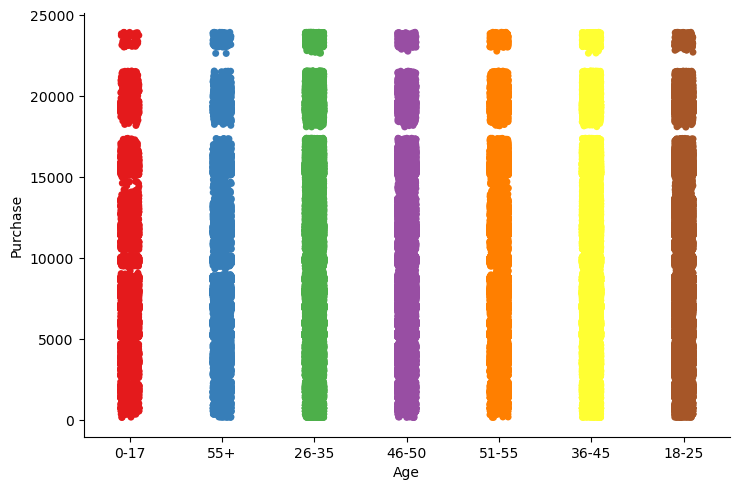

In [102]:
# Fonction catplot de Seaborn pour créer un graphique catégoriel
sns.catplot(x="Age", y="Purchase", data=black_friday, aspect=1.5, palette="Set1")

In [103]:
subset = black_friday.sample(3000)  # Prendre un échantillon aléatoire de 3000 individus
subset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
69473,1004626,P00003942,M,26-35,14,B,4+,0,5,14.0,NaN,5470
328055,1002526,P00234042,M,55+,13,B,4+,1,1,NaN,NaN,11945
364522,1002056,P00010742,M,26-35,4,B,2,0,1,8.0,17.0,11848
507989,1000235,P00005042,M,26-35,0,B,0,0,6,16.0,NaN,20455
205252,1001667,P00156742,M,51-55,16,B,4+,0,5,6.0,8.0,6858
...,...,...,...,...,...,...,...,...,...,...,...,...
349440,1005813,P00019342,M,26-35,7,A,1,1,1,6.0,15.0,15369
514887,1001303,P00338842,M,26-35,19,A,4+,0,11,16.0,NaN,4456
350852,1000011,P00034742,F,26-35,1,C,1,0,5,14.0,17.0,8591
457283,1004366,P00206042,M,18-25,15,B,0,0,5,NaN,NaN,5363


C:\Users\Charles\AppData\Local\Temp\ipykernel_12696\3342364194.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Age", y="Purchase", data=subset, aspect=1.5, palette="Set1") # Visualiser l'échantillon
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


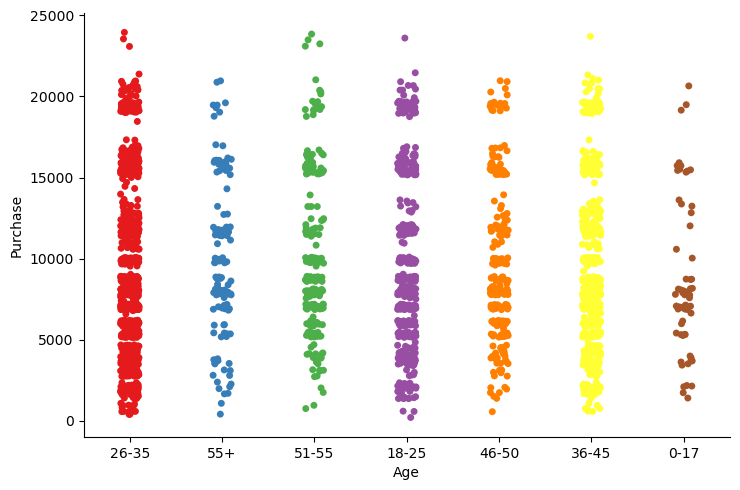

In [104]:
sns.catplot(x="Age", y="Purchase", data=subset, aspect=1.5, palette="Set1") # Visualiser l'échantillon

C:\Users\Charles\AppData\Local\Temp\ipykernel_12696\227667169.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Age", y="Purchase", data=subset, aspect=1.5, palette="Set1", kind="swarm") # Utiliser un graphique de type swarm (essaim)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.9% of the points 

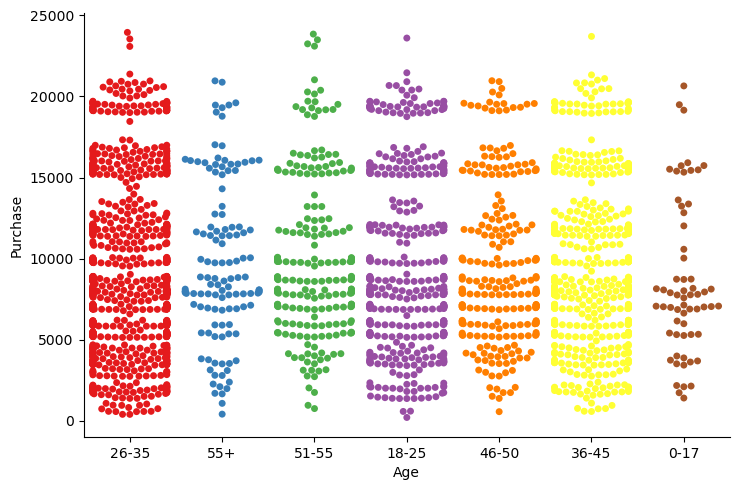

In [105]:
sns.catplot(x="Age", y="Purchase", data=subset, aspect=1.5, palette="Set1", kind="swarm") # Utiliser un graphique de type swarm (essaim)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points 

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


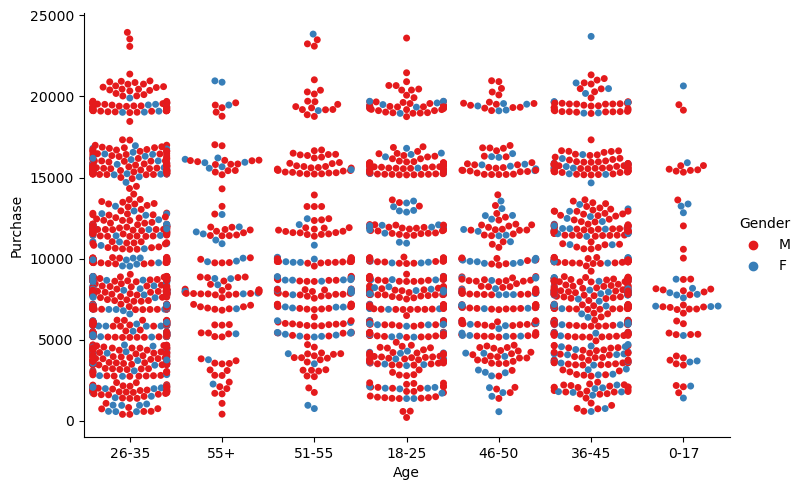

In [106]:
sns.catplot(x="Age", y="Purchase", data=subset, aspect=1.5, palette="Set1", kind="swarm", hue="Gender") # Ajouter une dimension avec le genre

### Combinaison de graphiques avec Seaborn

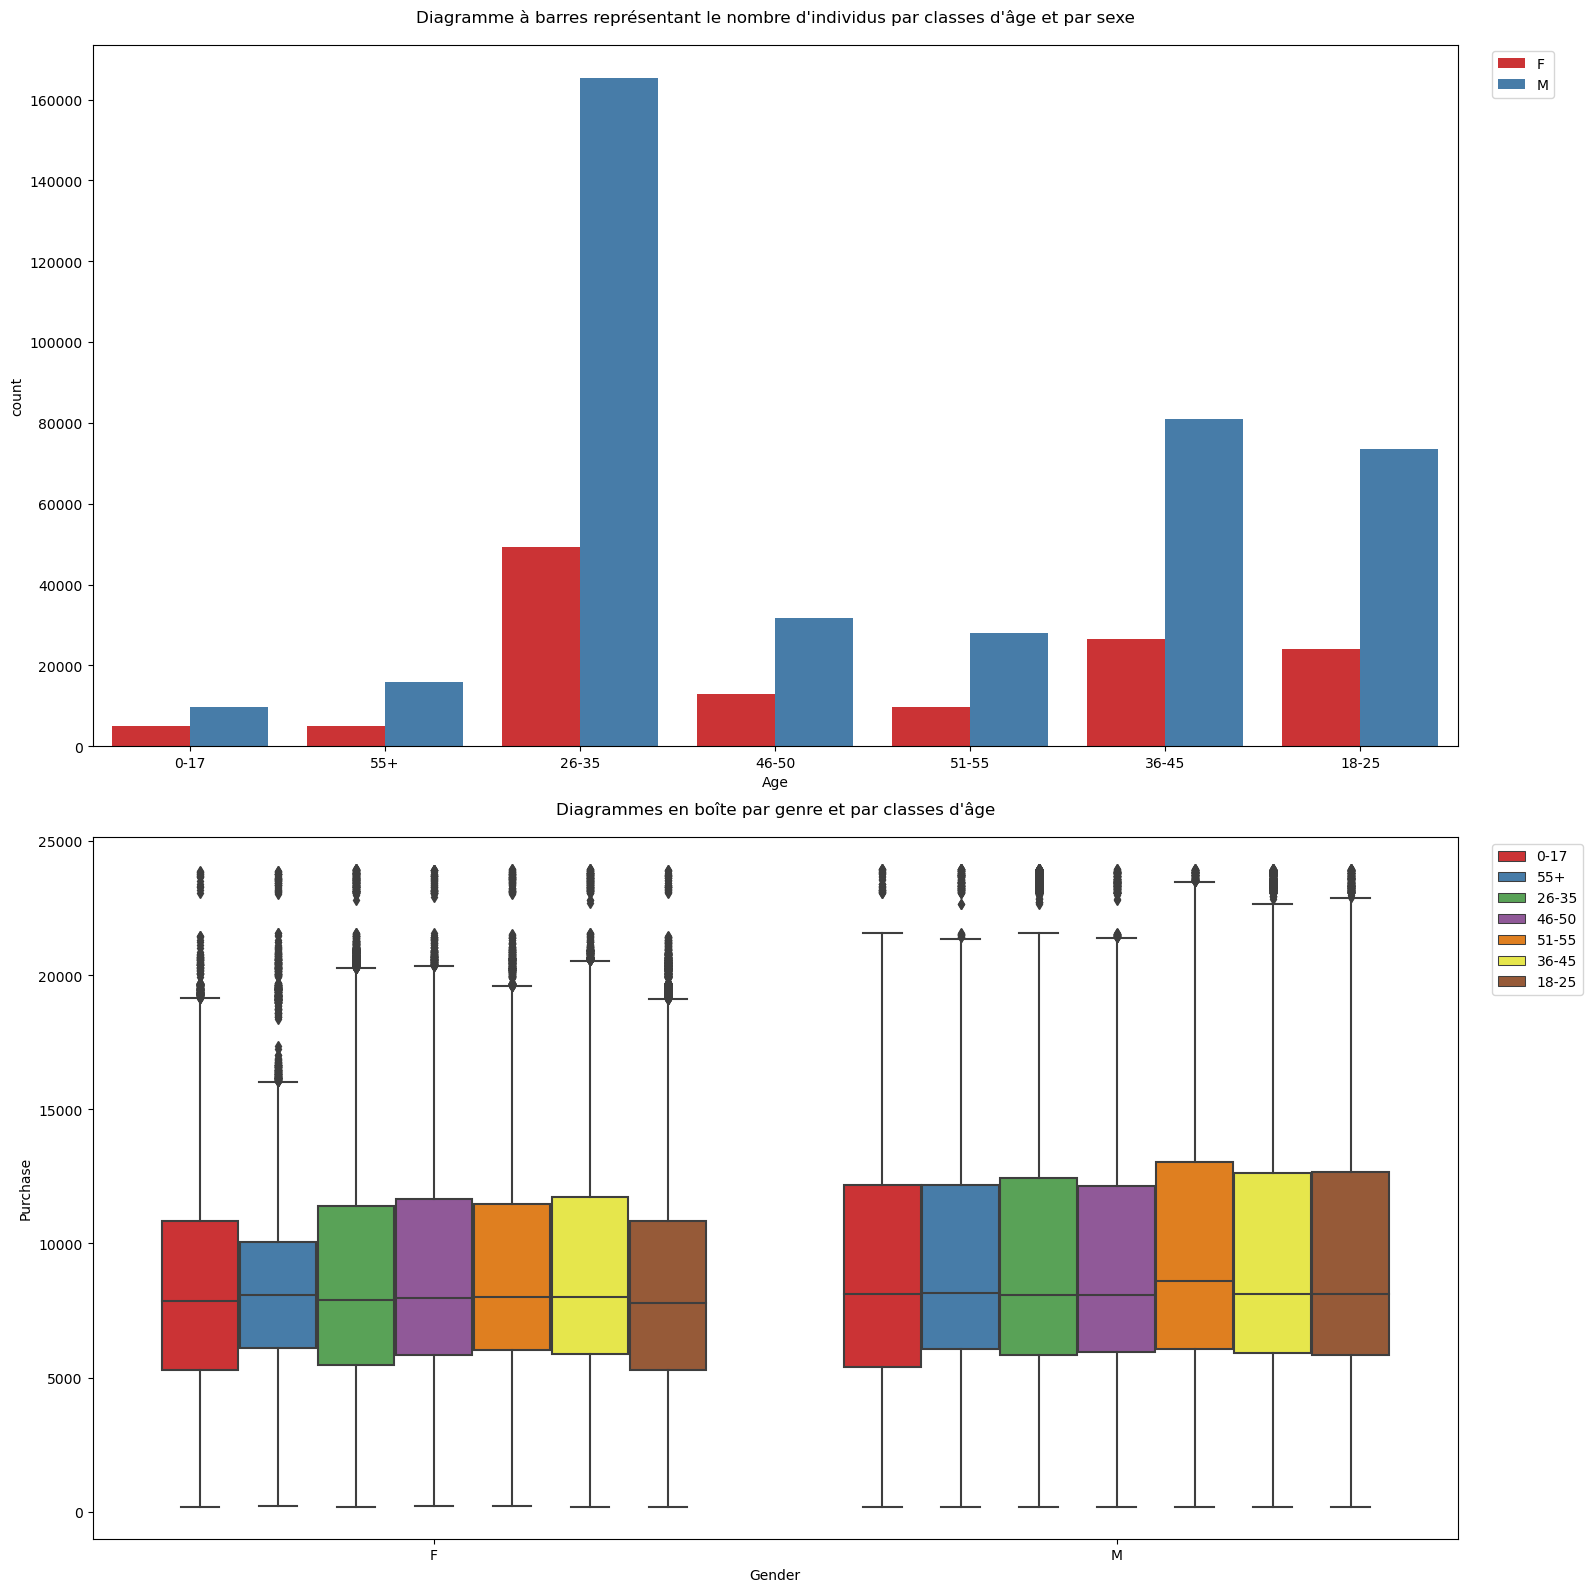

In [107]:
# Combiner plusieurs graphiques avec Seaborn
plt.subplot(2, 1, 1)
sns.countplot(x="Age", hue="Gender", data=black_friday, palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2) # Pour placer la légende en dehors du graphique
plt.title("Diagramme à barres représentant le nombre d'individus par classes d'âge et par sexe", y=1.02)
plt.subplot(2, 1, 2)
sns.boxplot(x="Gender", y="Purchase", hue="Age", data=black_friday, palette="Set1")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2) # Pour placer la légende en dehors du graphique
plt.title("Diagrammes en boîte par genre et par classes d'âge", y=1.02)
plt.tight_layout()
plt.savefig("graphiques_combinées.png", format="png", bbox_inches="tight")
plt.show()
plt.close()


## <font color="red">Exercice de la capsule 63 : Visualiser un jeu de données</font>

**Objectif : Explorer les additions encaissées par un restaurant**

1. Charger le jeu de données « tips » : tips = sns.load_dataset(‘tips’)
2. Tracer un barplot avec la fonction sns.barplot représentant la variable total_bill et en séparant ces données par sexe
3. Utiliser la fonction sns.distplot sur la variable total_bill pour étudier sa distribution
5. Utiliser la fonction jointplot de Seaborn pour tracer la variable total_bill (X) en fonction de la variable tip (Y) 
6. Utiliser la fonction pairplot de Seaborn sur l’ensemble du dataframe « tips » pour étudier les relations entre l’ensemble des variables.
7. Tracer le boxplot de la variable total_bill en créant un boxplot par jour (variable day) et en utilisant la variable sex dans l’option hue.

### Le jeu de données « tips »

Le jeu de données à analyser provient d'un restaurant et offre un aperçu détaillé de sa clientèle. Chaque ligne correspond à un client ayant pris un repas dans l'établissement. Les informations sont organisées en sept colonnes distinctes :

- total_bill : Montant total de l'addition
- tip : Pourboire laissé par le client
- sex : Genre du client (homme ou femme)
- smoker : Statut fumeur ou non-fumeur du client
- day : Jour de la semaine de la visite (jeudi, vendredi, samedi, dimanche)
- time : Moment de la journée (déjeuner ou dîner)
- size : Nombre de personnes dans le groupe

Cette structure permet une analyse approfondie des habitudes de consommation et des caractéristiques de la clientèle du restaurant. Ce jeu de données est intégré à Seaborn et est disponible aussi sur Kaggle.

Lien : [https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset](https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset)

### Les réponses aux questions de l'exercice

In [108]:
# Q1. Charger le jeu de données tips avec Seaborn
tips = sns.load_dataset("tips") 
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [109]:
tips.info() # Informations générales sur les colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [110]:
tips.head() # 5 premières lignes

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


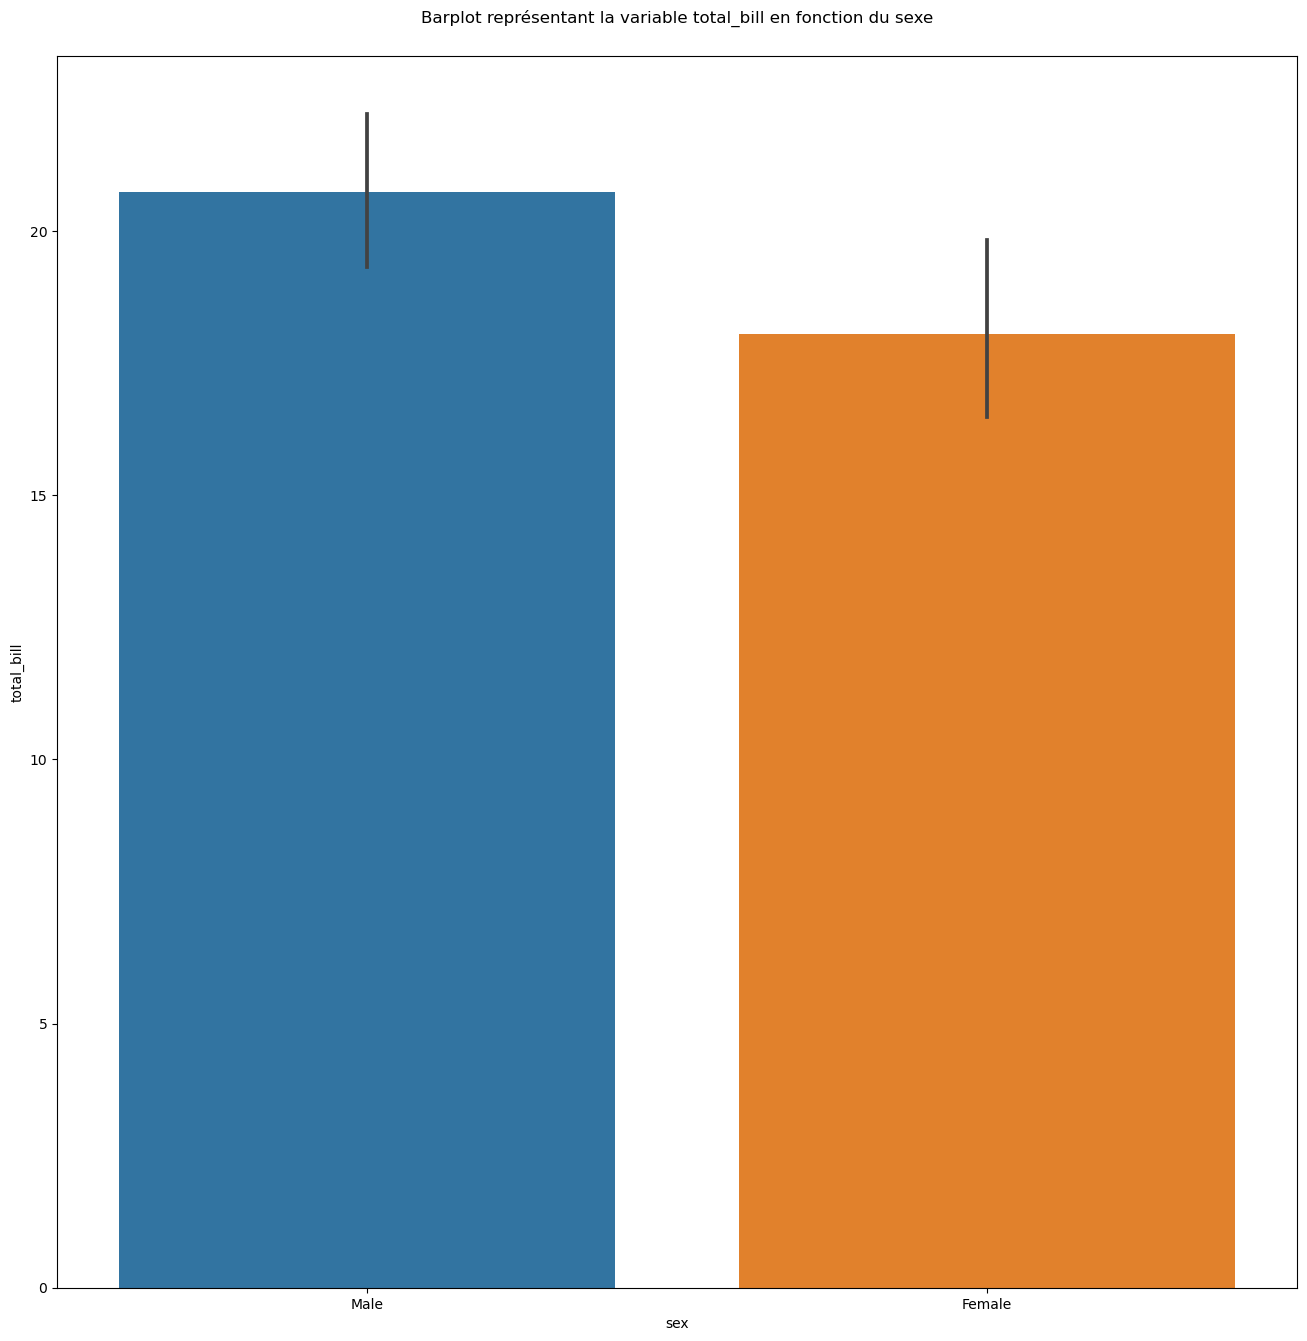

In [111]:
# Q2. Tracer un barplot avec la fonction sns.barplot représentant la variable total_bill et en séparant ces données par sexe
sns.barplot(x="sex", y="total_bill", data=tips)
plt.title("Barplot représentant la variable total_bill en fonction du sexe", y=1.02)
plt.show()

In [112]:
tips["total_bill"] # Afficher les valeurs de la variable total_bill

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [113]:
tips["sex"]

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: category
Categories (2, object): ['Male', 'Female']

In [114]:
tips["total_bill"].max() # Valeur maximale de la variable total_bill

50.81

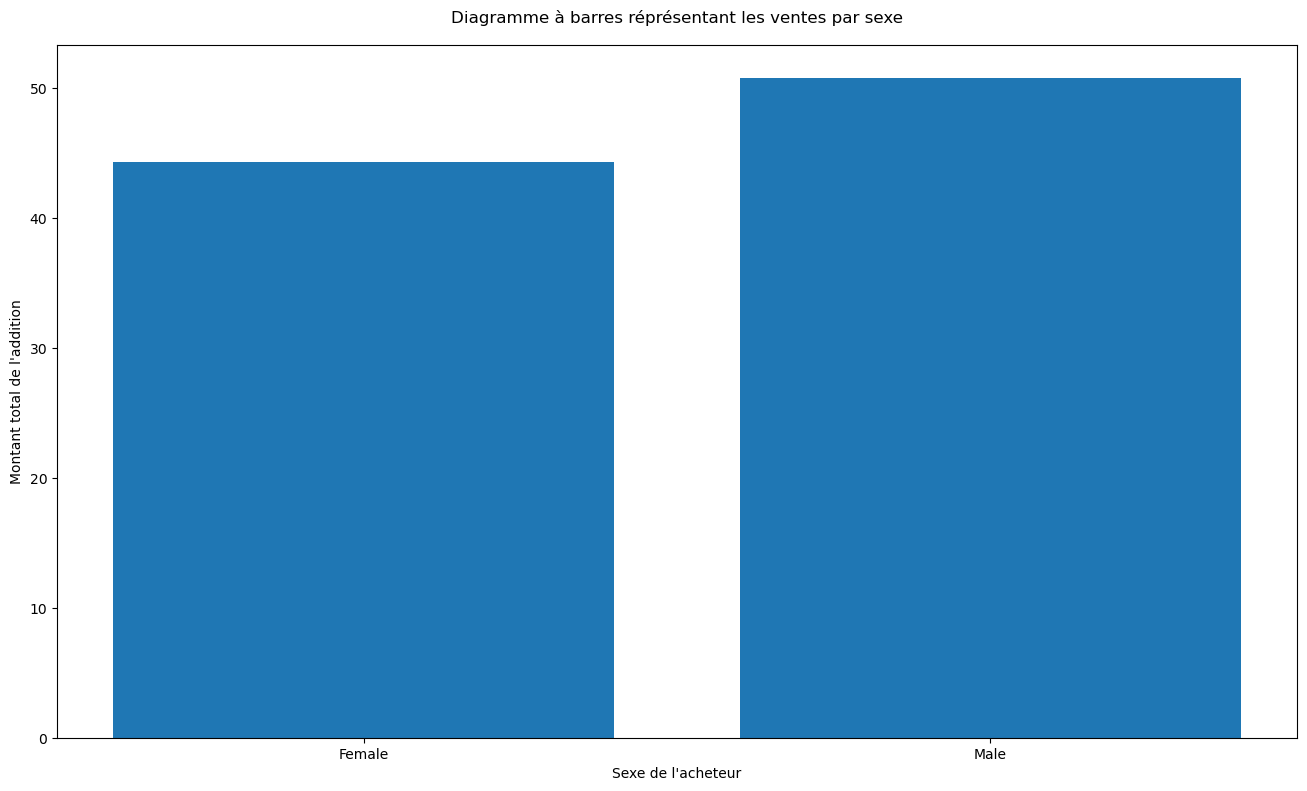

In [115]:
# Même question que précédemment avec Matplotlib
plt.rcParams["figure.figsize"] = (16, 9) # 16 pouces de largeur, 9 pouces de hauteur
plt.bar(tips["sex"].values, tips["total_bill"].values)
plt.xlabel("Sexe de l'acheteur")
plt.ylabel("Montant total de l'addition")
plt.title("Diagramme à barres réprésentant les ventes par sexe", y=1.02)
plt.show()

C:\Users\Charles\AppData\Local\Temp\ipykernel_12696\3223148060.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips["total_bill"])


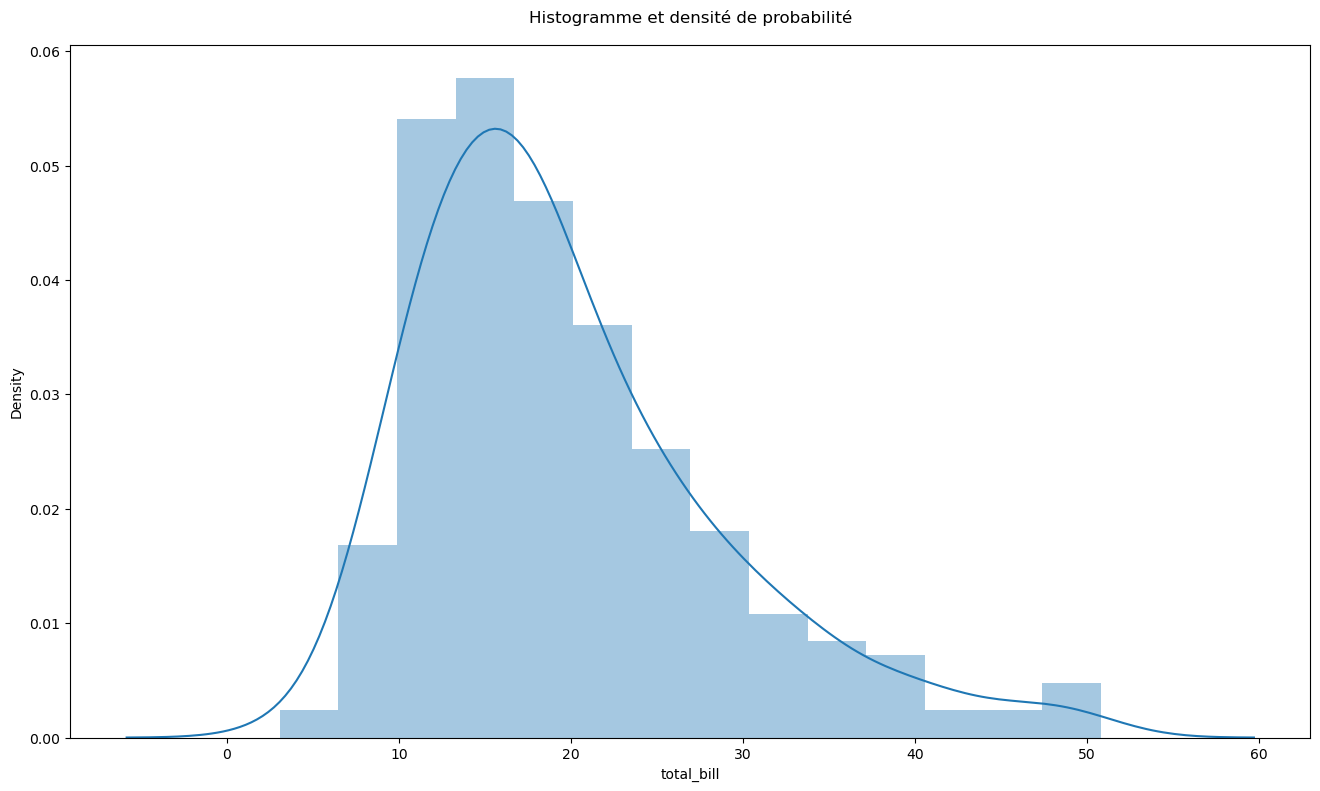

In [116]:
# Q3. Utiliser la fonction sns.distplot sur la variable total_bill pour étudier sa distribution
# Par défaut, la fonction sns.distplot trace un histogramme et une estimation de la densité de probabilité
# Elle utilise ma méthode de la densité de noyau pour estimer la densité de probabilité approximative d'une variable aléatoire continue. On appelle cette méthode d'estimation KDE (Kernel Density Estimation).
sns.distplot(tips["total_bill"]) 
plt.title("Histogramme et densité de probabilité", y=1.02)
plt.show()

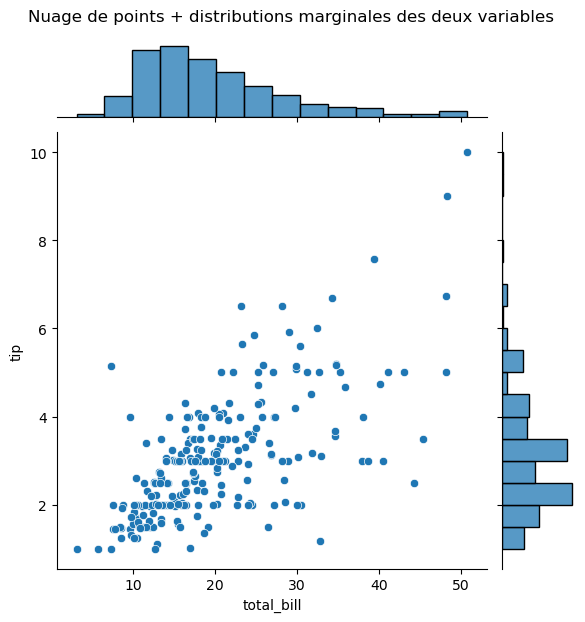

In [117]:
# Q4 - Utiliser la fonction jointplot de Seaborn pour tracer la variable total_bill (X) en fonction de la variable tip (Y) 
# Par défaut, la fonction jointplot trace un nuage de points et les distributions marginales des deux variables
sns.jointplot(x="total_bill", y="tip", data=tips) 
plt.suptitle("Nuage de points + distributions marginales des deux variables", y=1.03)
plt.show()

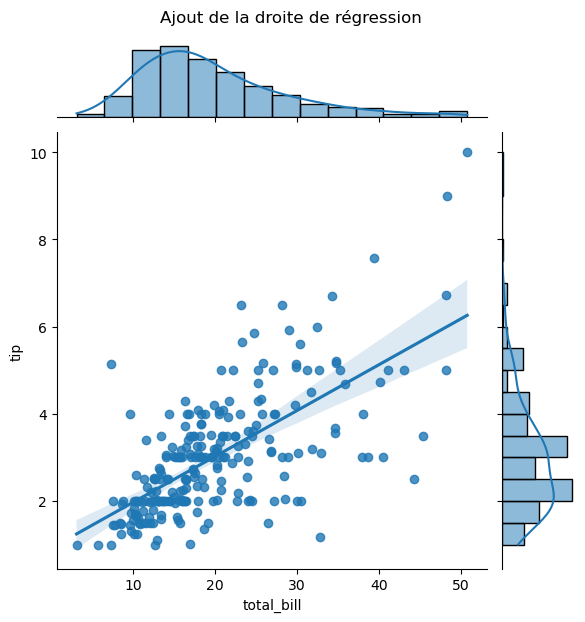

In [118]:
# kind="reg" pour ajouter une régression linéaire
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")
plt.suptitle("Ajout de la droite de régression", y=1.03)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


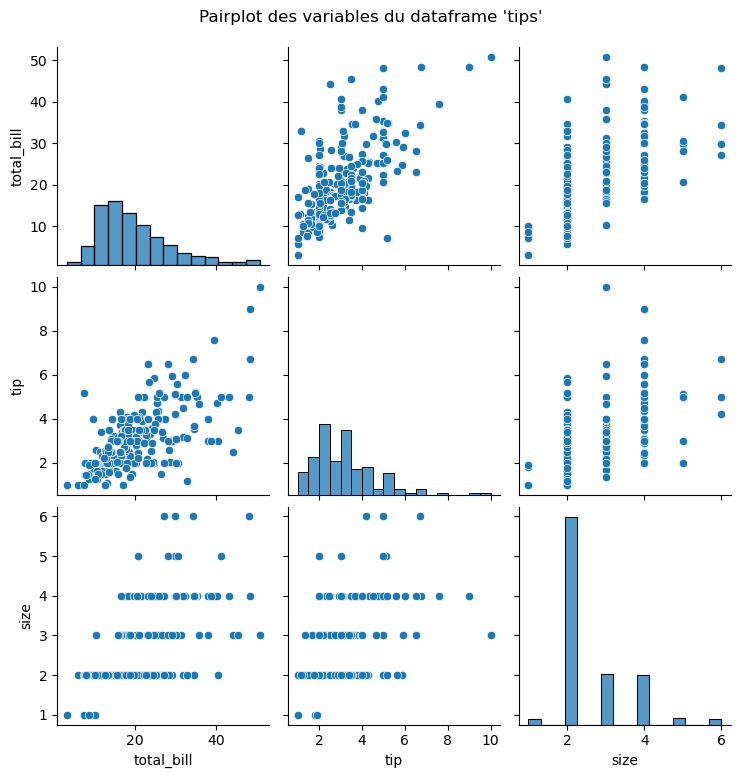

In [119]:
# Q5. Utiliser la fonction pairplot de Seaborn sur l’ensemble du dataframe « tips » pour étudier les relations entre l’ensemble des variables.
# La fonction pairplot trace par défaut un nuage de points pour chaque paire de variables et une distribution marginale pour chaque variable
sns.pairplot(tips)
plt.suptitle("Pairplot des variables du dataframe 'tips'", y=1.03)
plt.show()

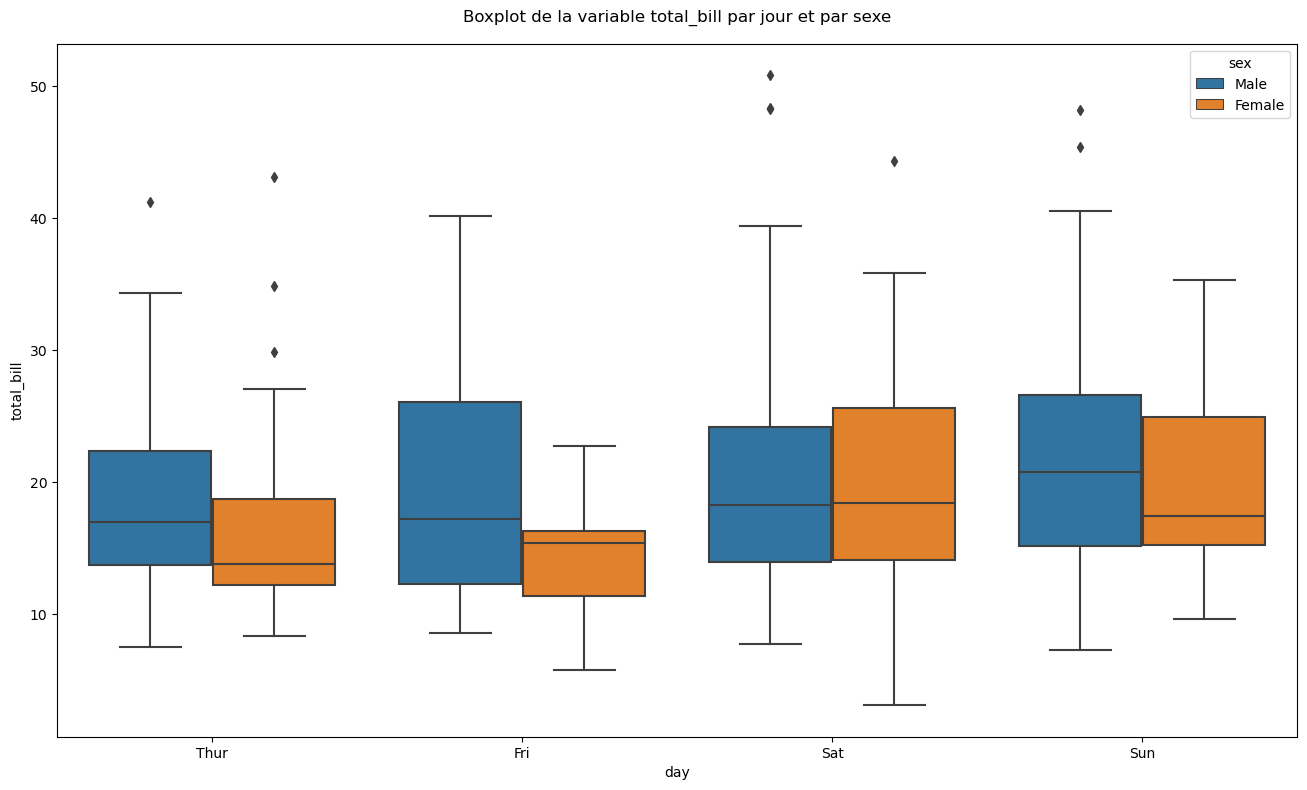

In [120]:
# Q6. Tracer le boxplot de la variable total_bill en créant un boxplot par jour (variable day) et en utilisant la variable sex dans l’option hue.
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("Boxplot de la variable total_bill par jour et par sexe", y=1.02)
plt.show()